In [1]:
import pandas as pd
import os

data_dirs = {
    'anomaly_free': 'anomaly-free',
    'valve1': 'valve1',
    'valve2': 'valve2'
}

def load_csv_files_from_dir(directory_path, include_filename=False):
    df_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path, sep=';', decimal='.', parse_dates=['datetime'])
            if include_filename:
                df['source_file'] = filename
            df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Load the datasets
anomaly_free_df = load_csv_files_from_dir('anomaly-free')
valve1_df = load_csv_files_from_dir('valve1', include_filename=True)
valve2_df = load_csv_files_from_dir('valve2', include_filename=True)

# Display information about the datasets
print("Anomaly-Free Data:")
print(anomaly_free_df.info())
print("\nValve1 Data:")
print(valve1_df.info())
print("\nValve2 Data:")
print(valve2_df.info())

# Show basic statistics for numerical columns
print("\nAnomaly-Free Data Description:")
print(anomaly_free_df.describe())

print("\nValve1 Data Description:")
print(valve1_df.describe())

print("\nValve2 Data Description:")
print(valve2_df.describe())

# Check for missing values
print("\nMissing values in Anomaly-Free Data:")
print(anomaly_free_df.isnull().sum())

print("\nMissing values in Valve1 Data:")
print(valve1_df.isnull().sum())

print("\nMissing values in Valve2 Data:")
print(valve2_df.isnull().sum())


Anomaly-Free Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             9405 non-null   datetime64[ns]
 1   Accelerometer1RMS    9405 non-null   float64       
 2   Accelerometer2RMS    9405 non-null   float64       
 3   Current              9405 non-null   float64       
 4   Pressure             9405 non-null   float64       
 5   Temperature          9405 non-null   float64       
 6   Thermocouple         9405 non-null   float64       
 7   Voltage              9405 non-null   float64       
 8   Volume Flow RateRMS  9405 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 661.4 KB
None

Valve1 Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18160 entries, 0 to 18159
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
--

Feature Distributions for Anomaly-Free Data


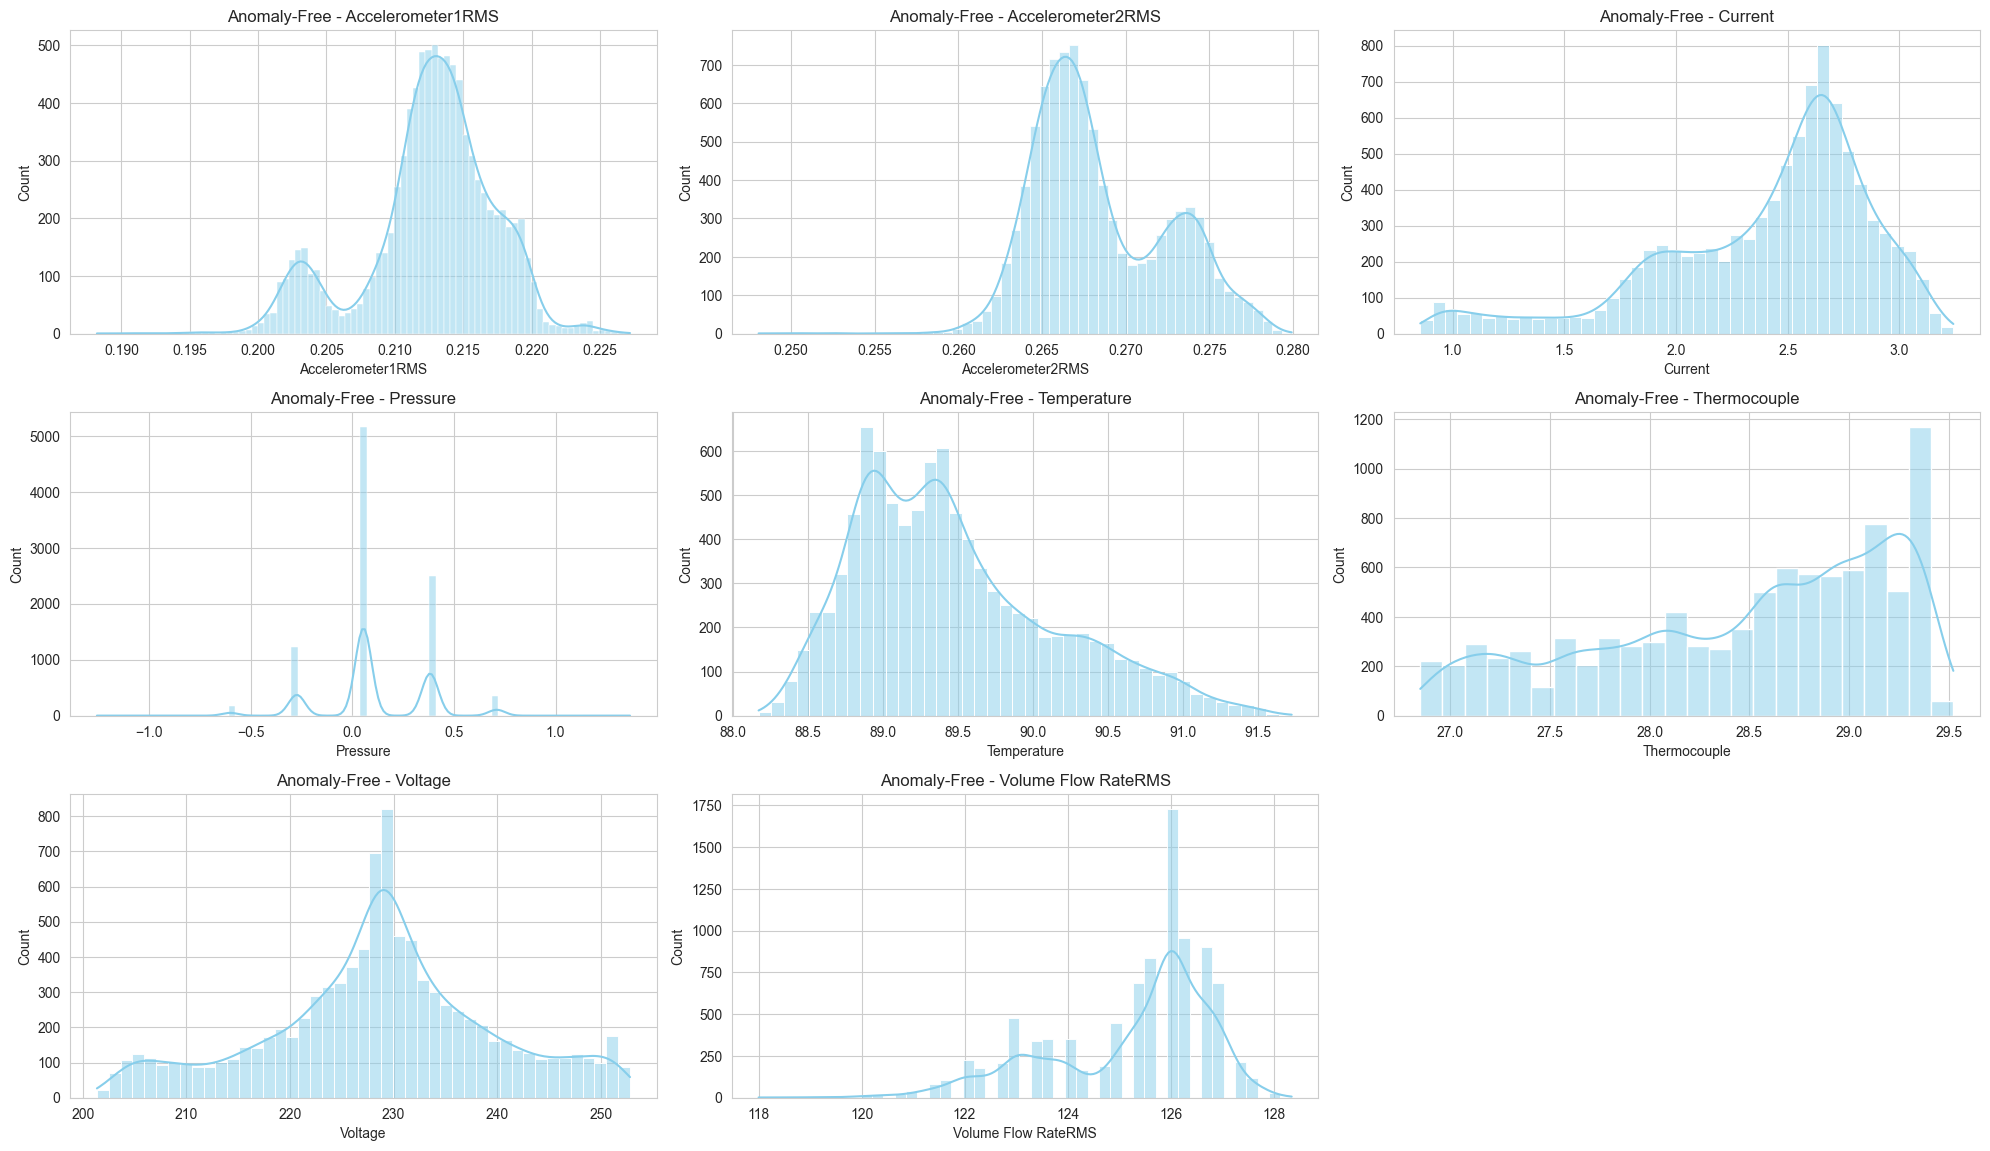

Feature Distributions for Valve1 Data


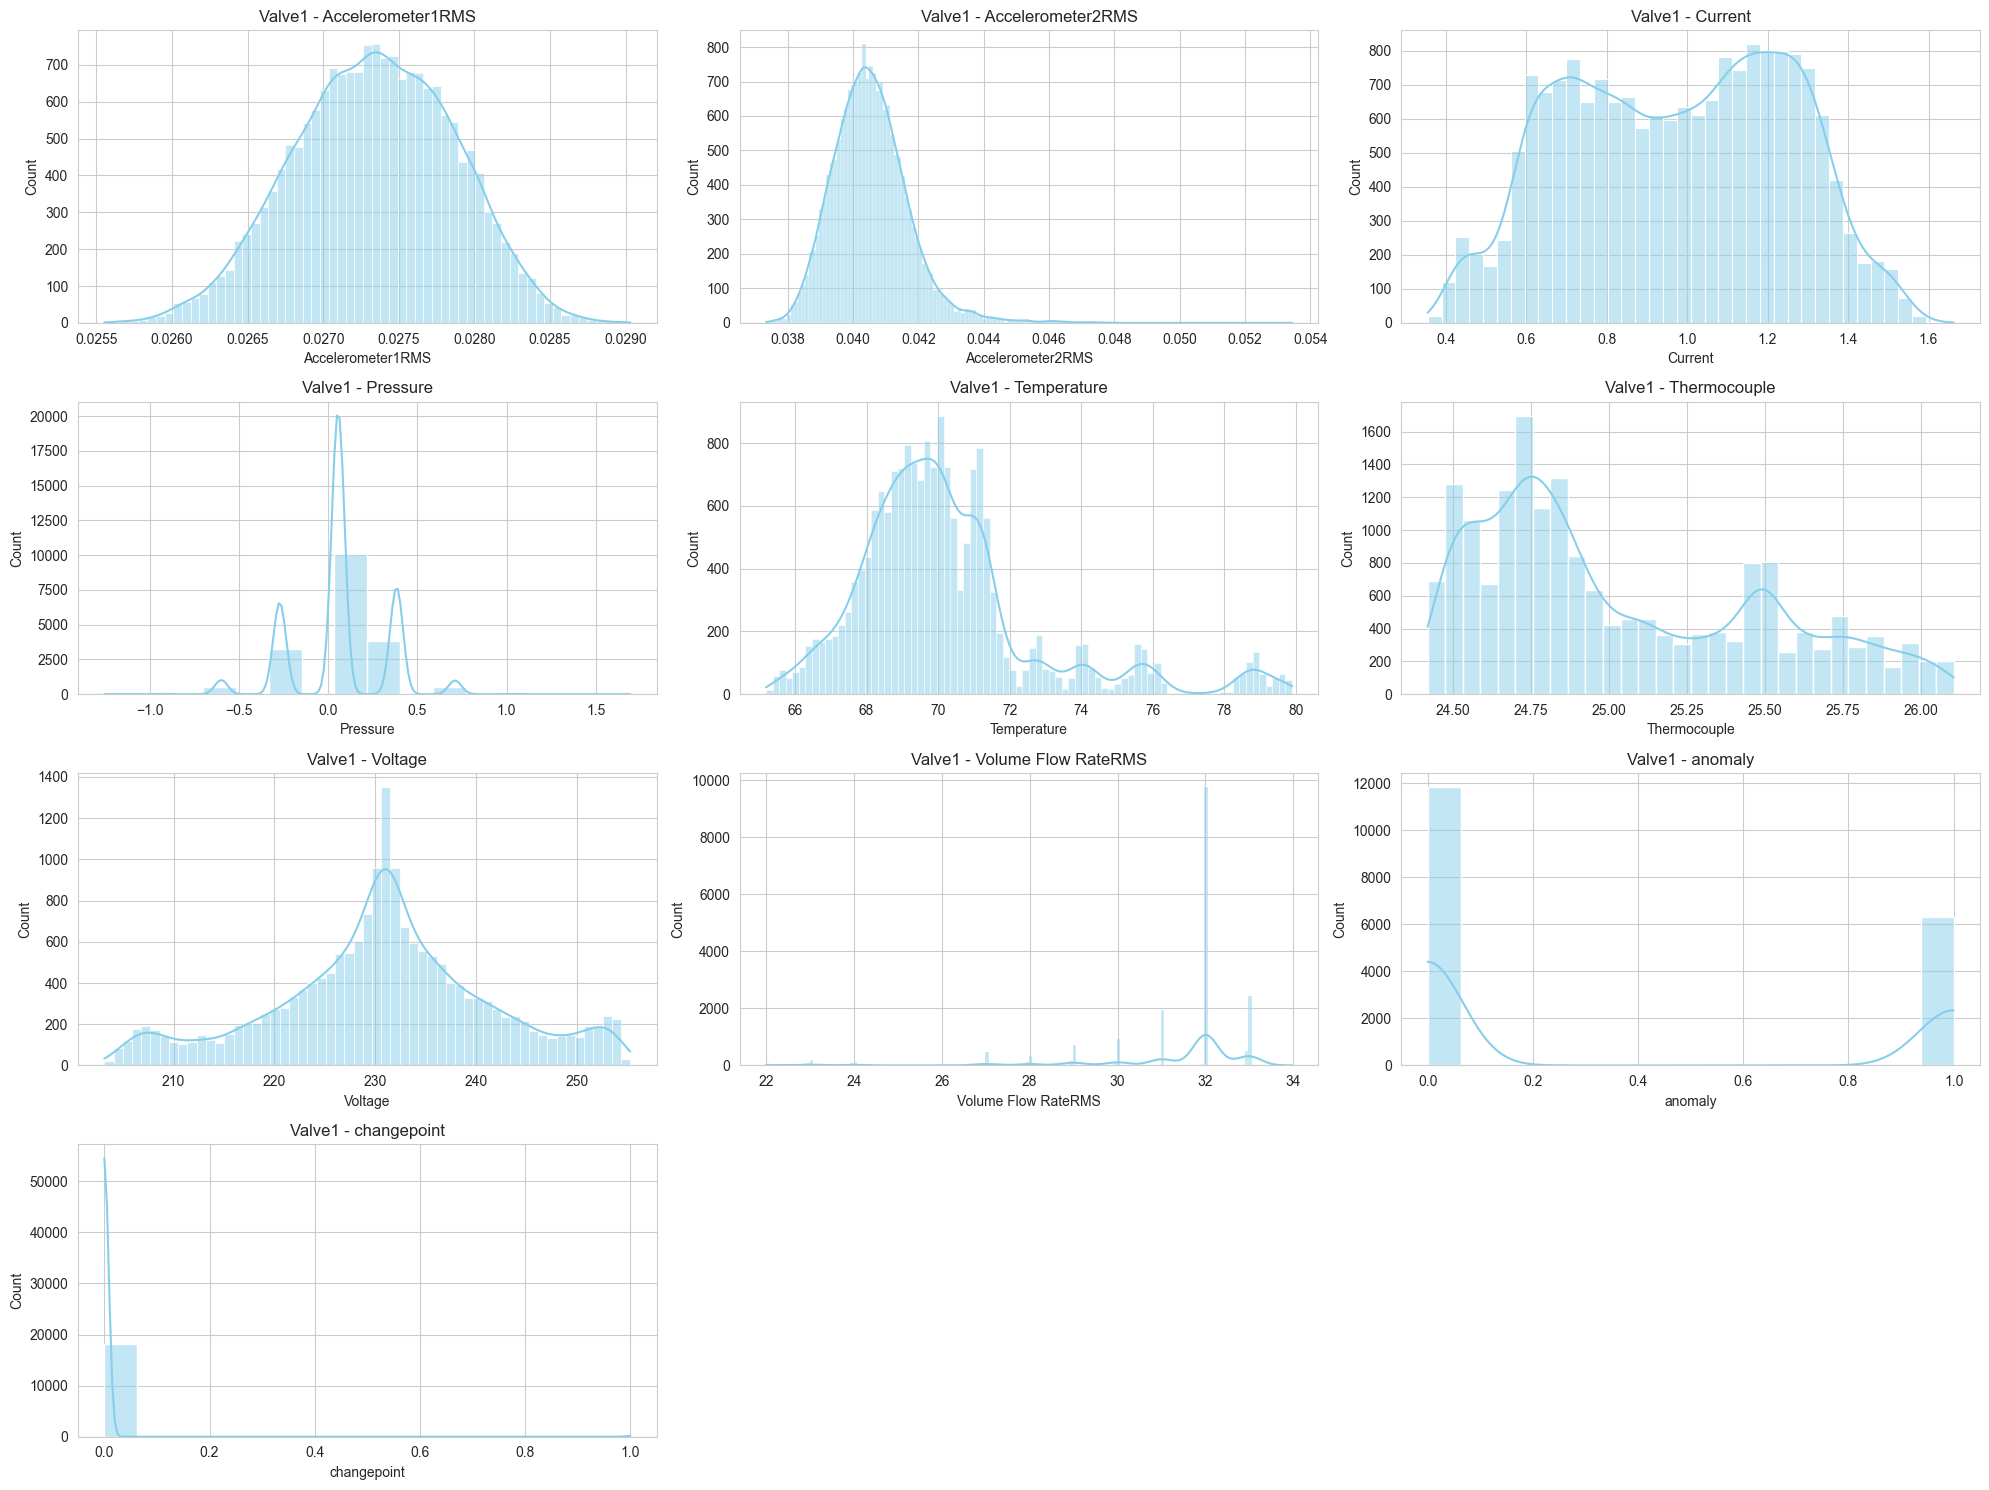

Feature Distributions for Valve2 Data


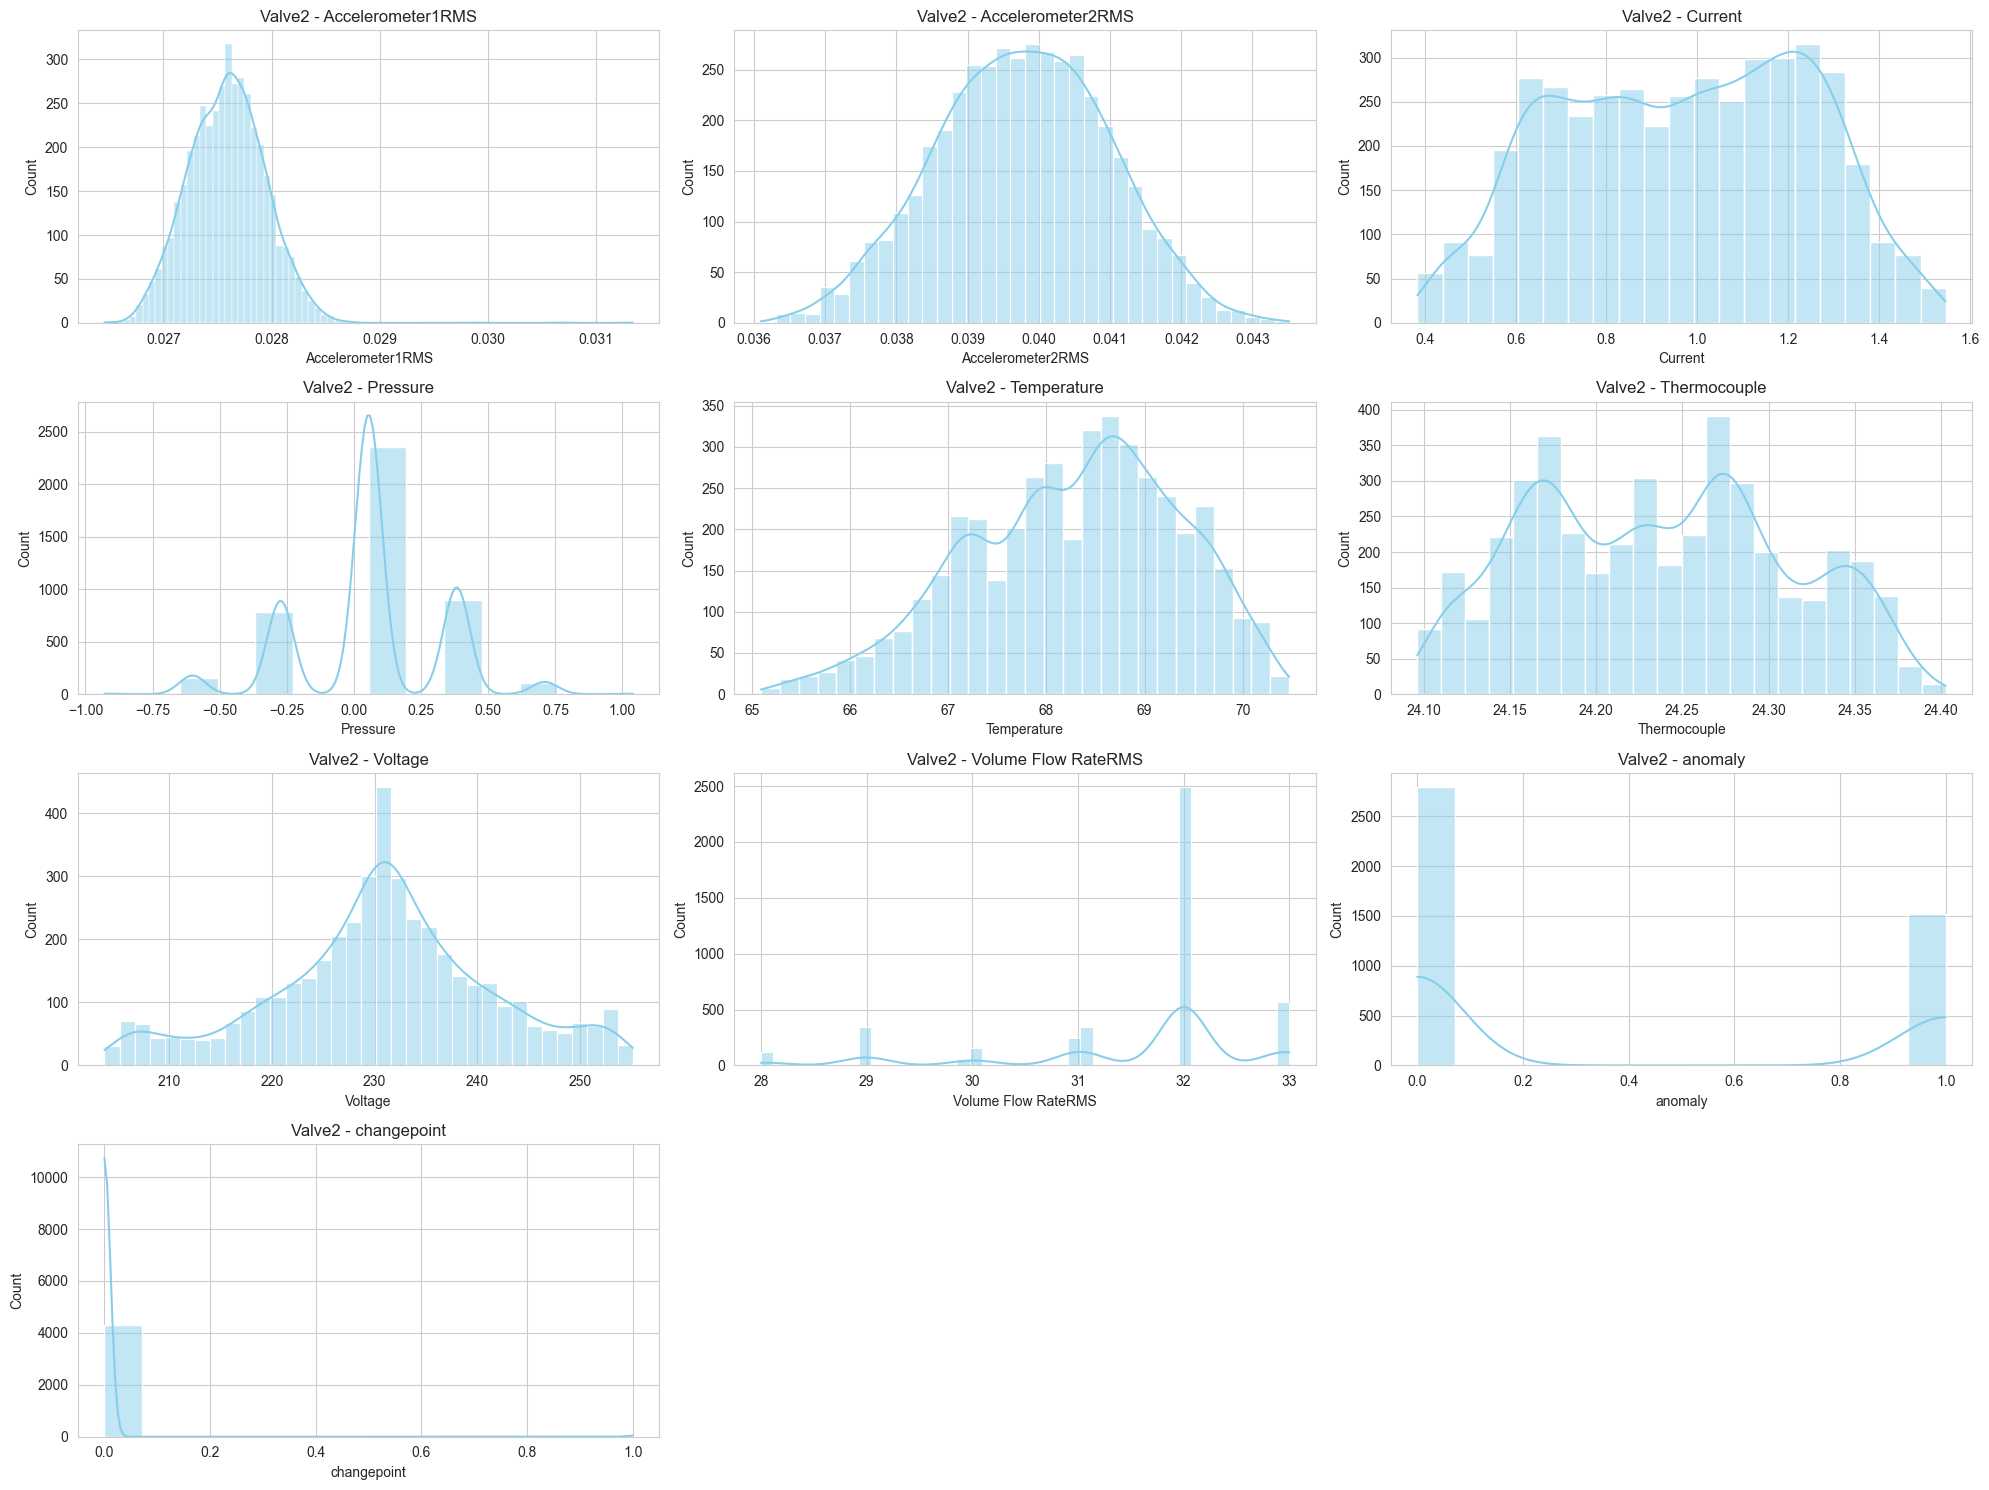

Correlation Heatmap for Anomaly-Free Data


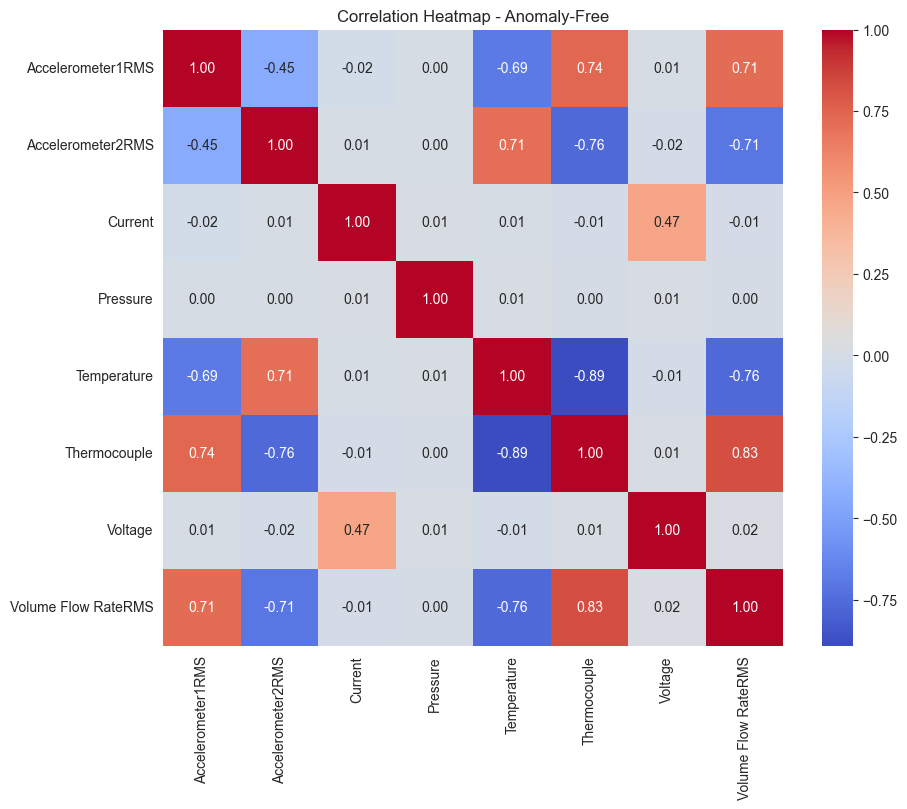

Correlation Heatmap for Valve1 Data


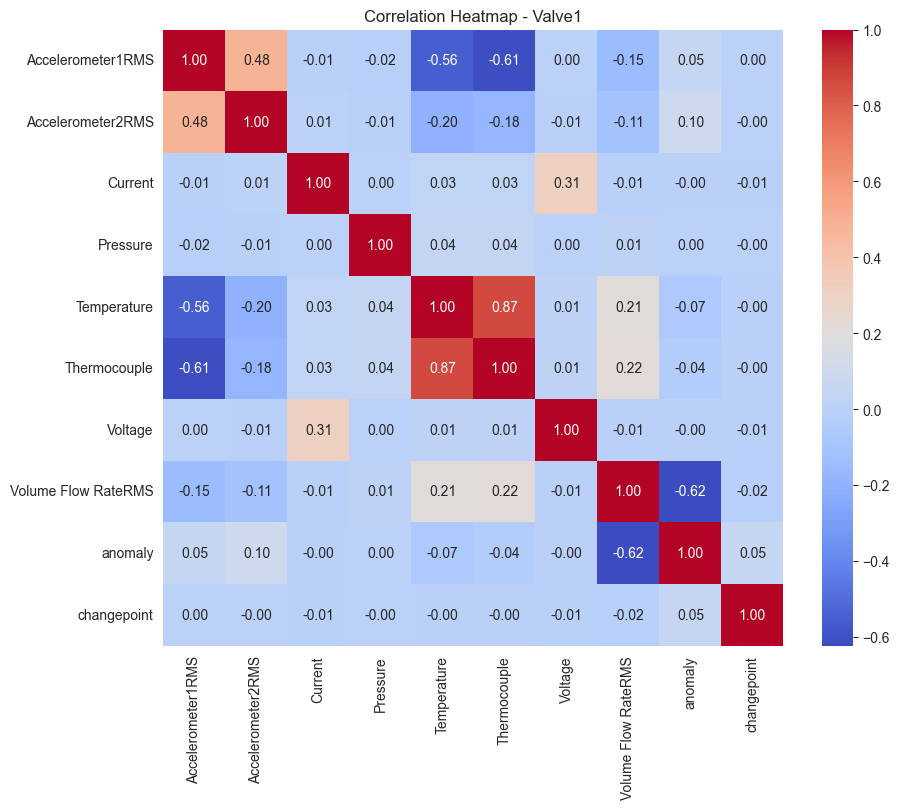

Correlation Heatmap for Valve2 Data


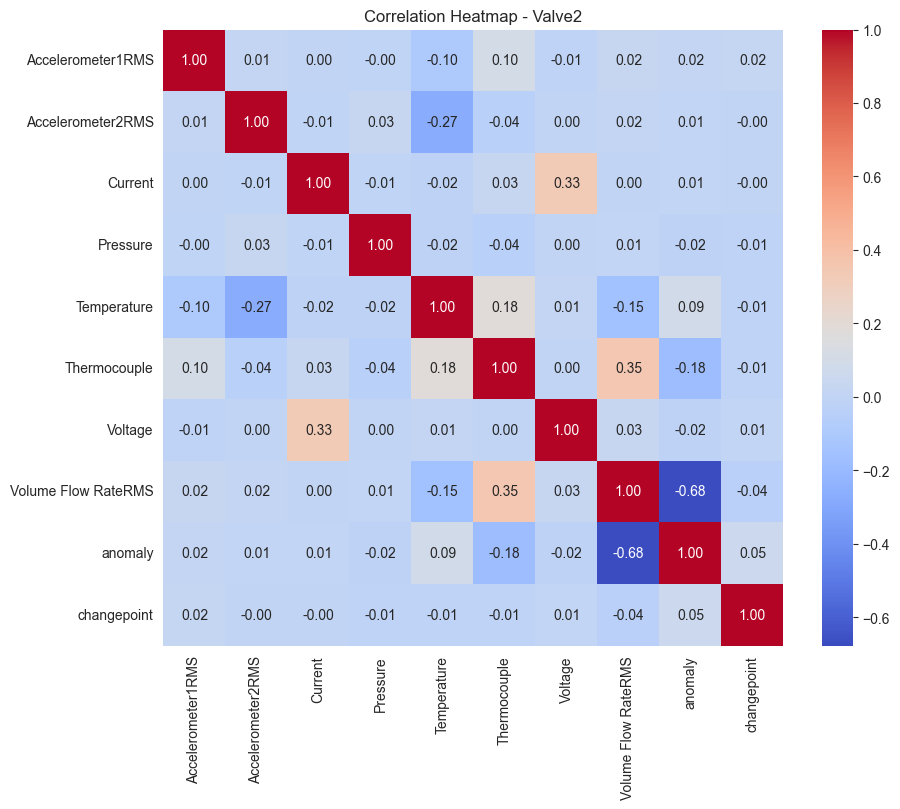

Time Series for Anomaly-Free Data


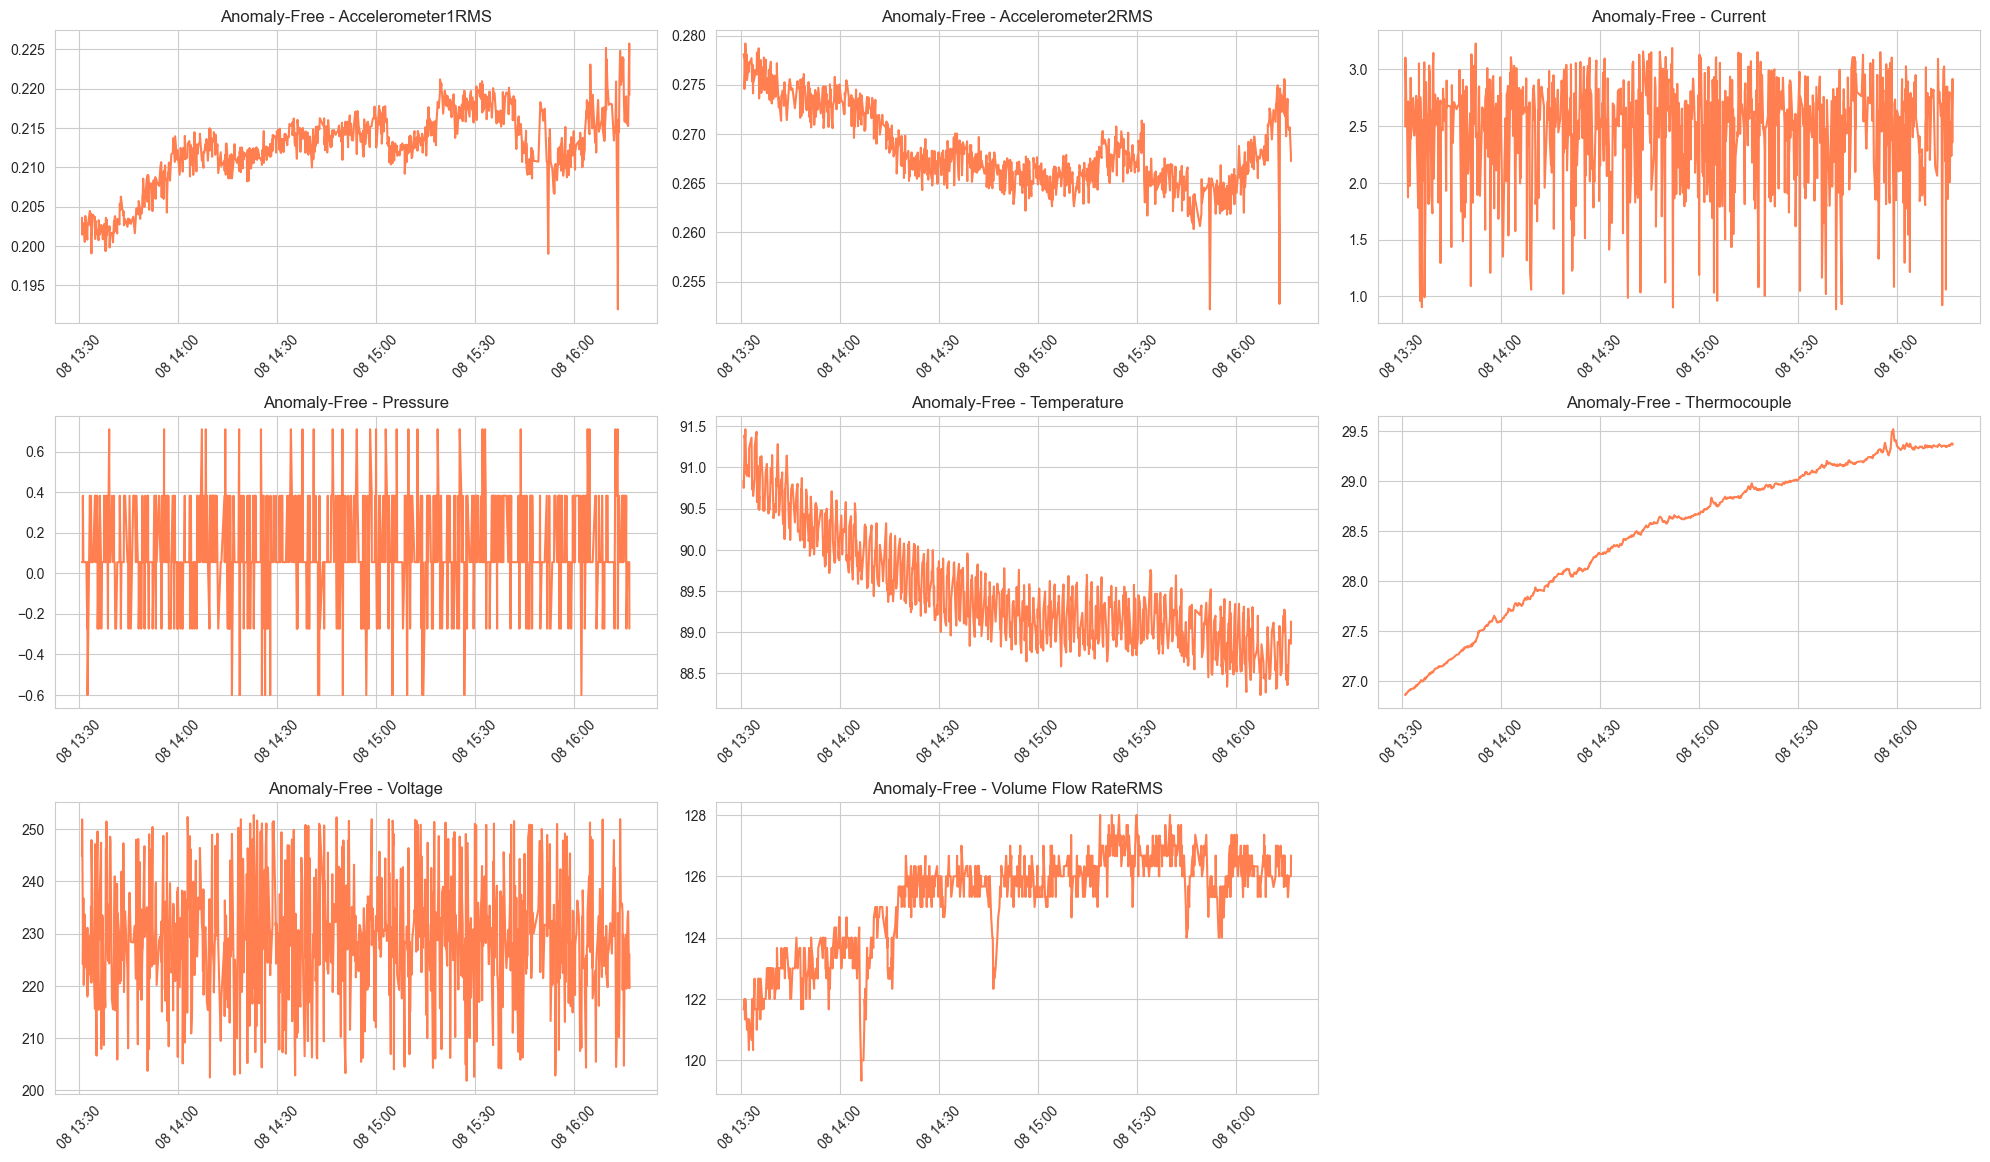

Time Series for Valve1 Data


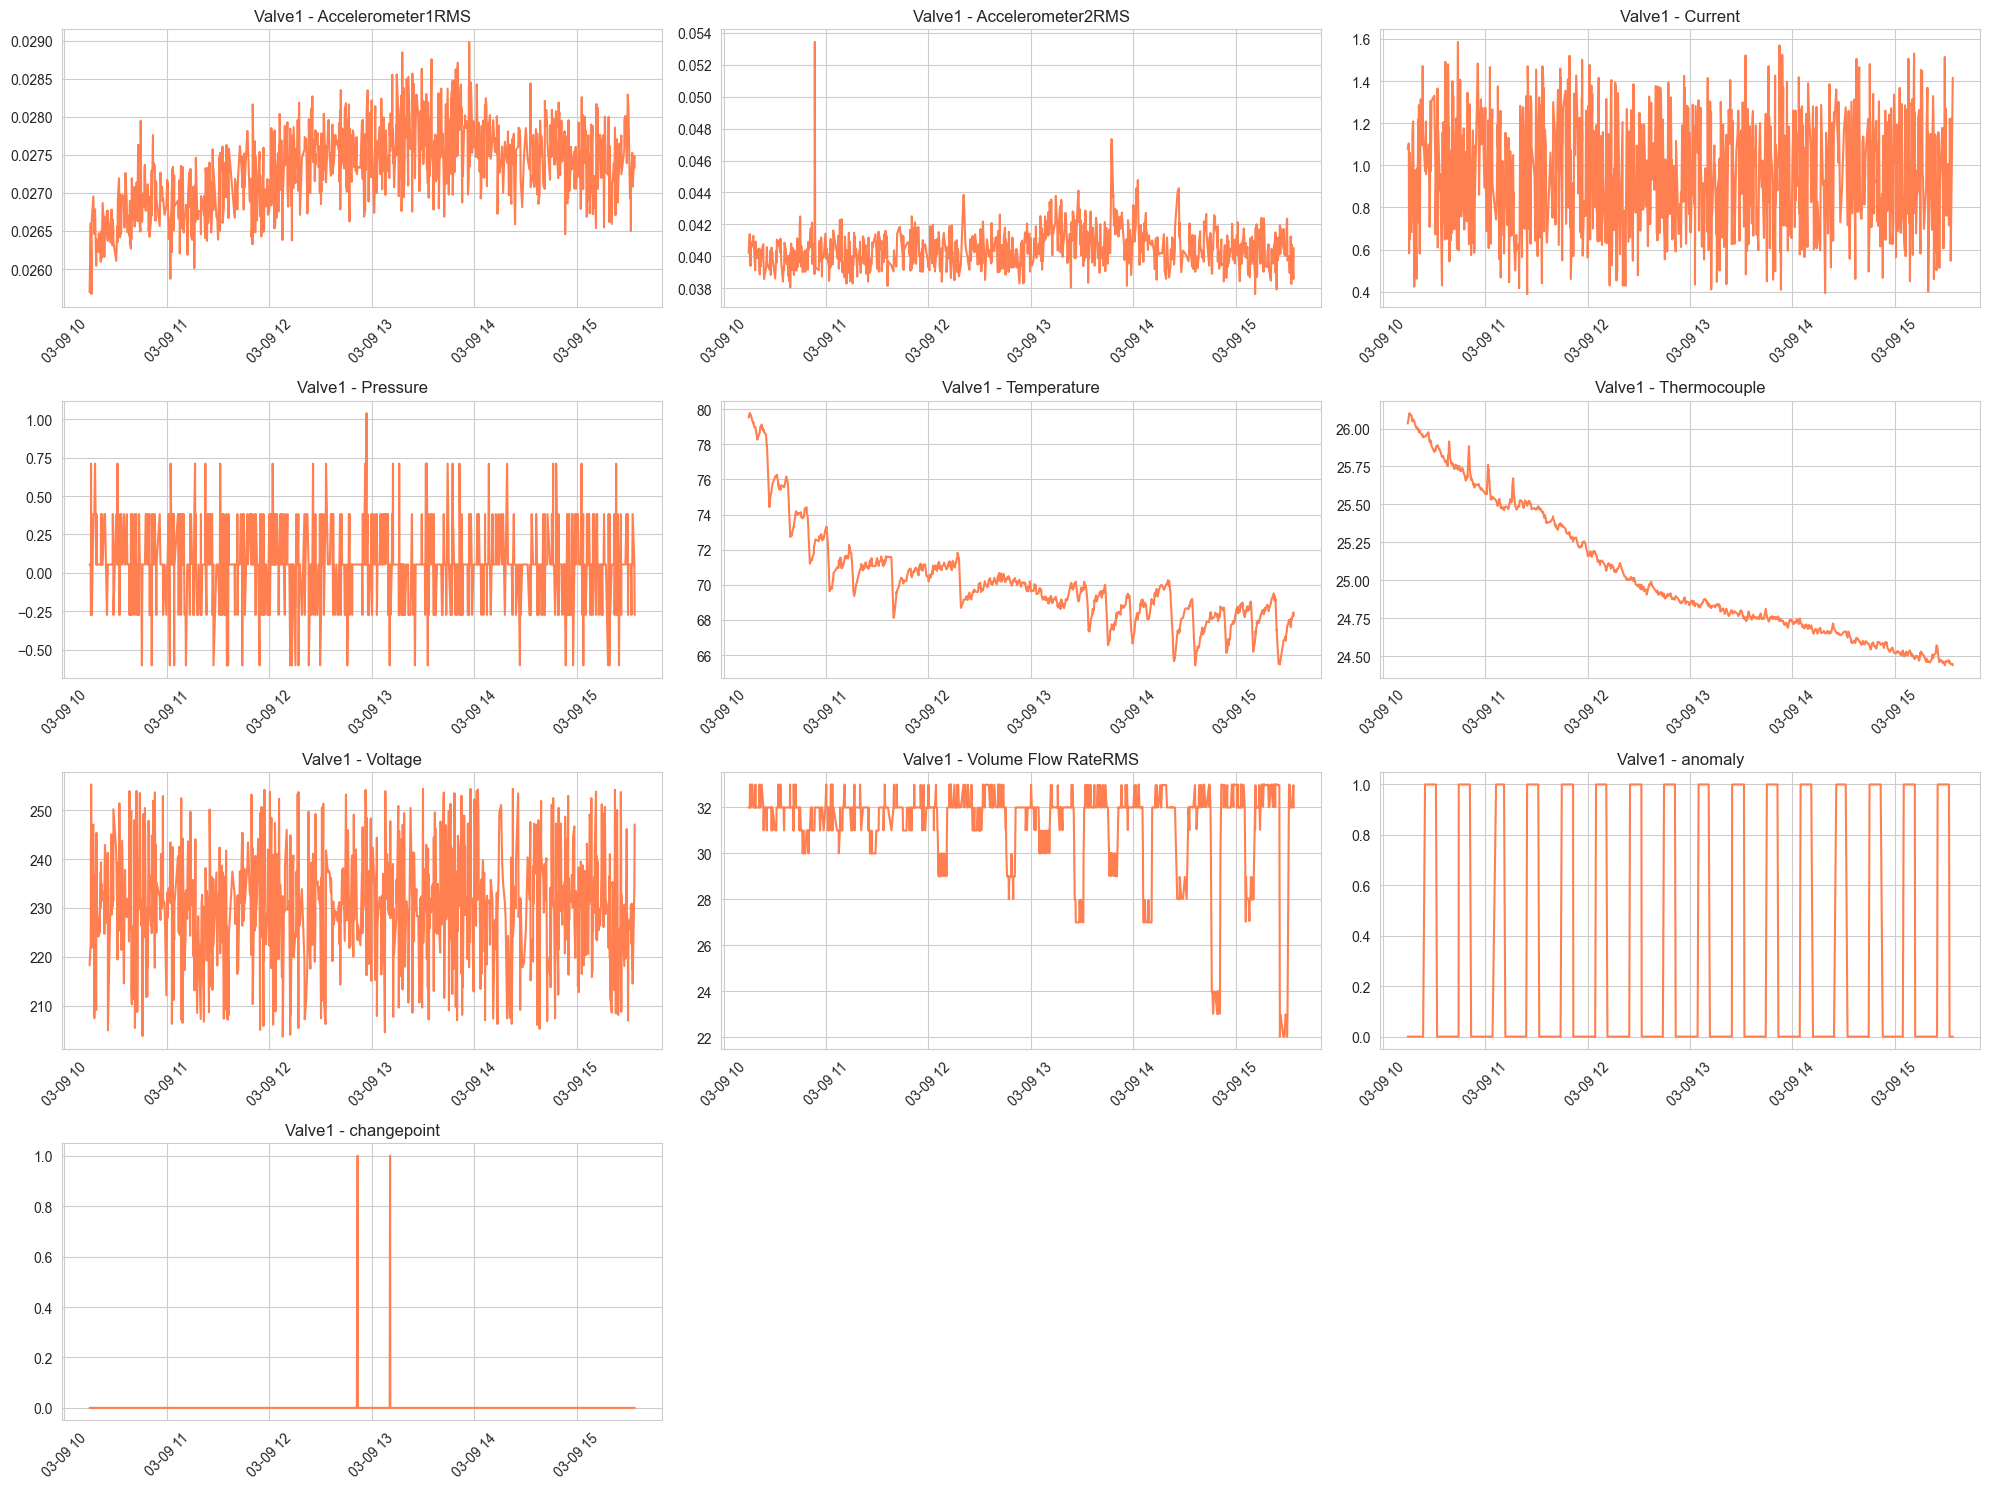

Time Series for Valve2 Data


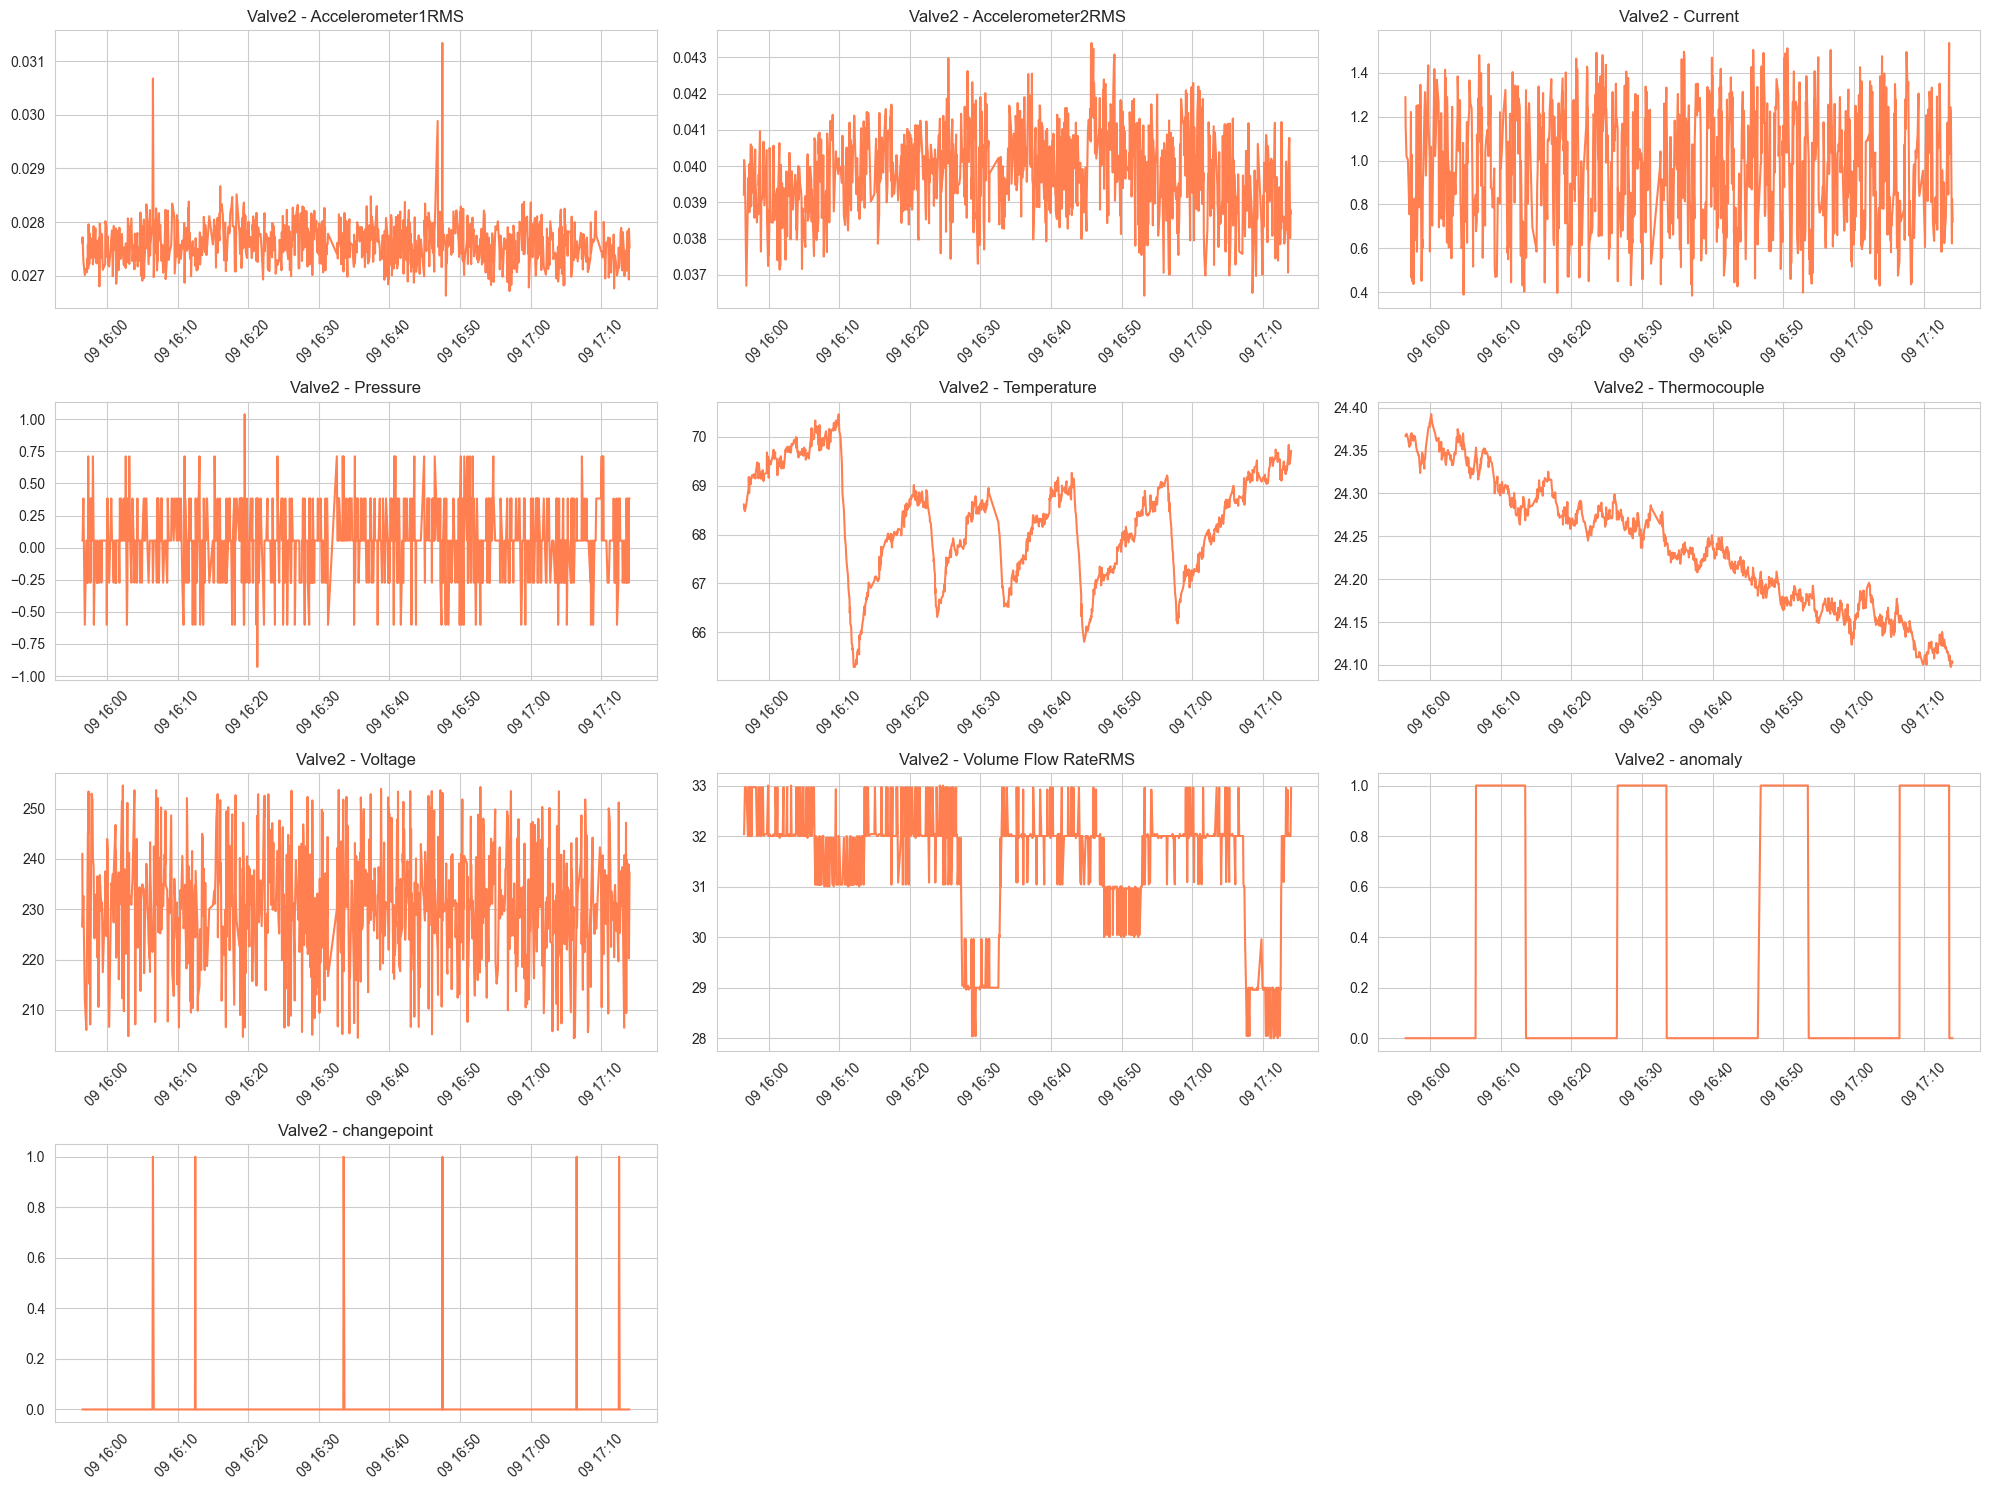

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set_style("whitegrid")

# 1. Visualize distributions of all features for each dataset
def plot_feature_distributions(df, dataset_name):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'{dataset_name} - {column}')
    plt.tight_layout()
    plt.show()

# Plot distributions for each dataset
print("Feature Distributions for Anomaly-Free Data")
plot_feature_distributions(anomaly_free_df, "Anomaly-Free")

print("Feature Distributions for Valve1 Data")
plot_feature_distributions(valve1_df, "Valve1")

print("Feature Distributions for Valve2 Data")
plot_feature_distributions(valve2_df, "Valve2")

# 2. Correlation heatmap for each dataset
def plot_correlation_heatmap(df, dataset_name):
    numeric_columns = df.select_dtypes(include=['float64'])
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_columns.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Correlation Heatmap - {dataset_name}')
    plt.show()

# Plot correlation heatmaps
print("Correlation Heatmap for Anomaly-Free Data")
plot_correlation_heatmap(anomaly_free_df, "Anomaly-Free")

print("Correlation Heatmap for Valve1 Data")
plot_correlation_heatmap(valve1_df, "Valve1")

print("Correlation Heatmap for Valve2 Data")
plot_correlation_heatmap(valve2_df, "Valve2")

# 3. Plot time series for each feature
def plot_time_series(df, dataset_name, max_points=1000):
    """Plot time series for each feature"""
    numeric_columns = df.select_dtypes(include=['float64']).columns
    sample_df = df.sample(n=min(max_points, len(df))).sort_values('datetime')
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        plt.plot(sample_df['datetime'], sample_df[column], color='coral')
        plt.title(f'{dataset_name} - {column}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot time series for each dataset
print("Time Series for Anomaly-Free Data")
plot_time_series(anomaly_free_df, "Anomaly-Free")

print("Time Series for Valve1 Data")
plot_time_series(valve1_df, "Valve1")

print("Time Series for Valve2 Data")
plot_time_series(valve2_df, "Valve2")


In [ ]:
## LOF

In [3]:
from sklearn.preprocessing import StandardScaler

# Function to prepare data for LOF
def prepare_data_for_lof(anomaly_free_df, valve1_df, valve2_df):
    # Combine all datasets for consistent scaling
    combined_df = pd.concat([anomaly_free_df, valve1_df, valve2_df], ignore_index=True)
    
    # Select numeric features for scaling
    numeric_columns = [
        "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
        "Temperature", "Thermocouple", "Voltage", "Volume Flow RateRMS"
    ]
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    combined_scaled = scaler.fit_transform(combined_df[numeric_columns])
    
    # Split back into individual datasets
    anomaly_free_scaled = combined_scaled[:len(anomaly_free_df)]
    valve1_scaled = combined_scaled[len(anomaly_free_df):len(anomaly_free_df) + len(valve1_df)]
    valve2_scaled = combined_scaled[len(anomaly_free_df) + len(valve1_df):]
    
    return anomaly_free_scaled, valve1_scaled, valve2_scaled, scaler

# Prepare scaled data
anomaly_free_scaled, valve1_scaled, valve2_scaled, scaler = prepare_data_for_lof(
    anomaly_free_df, valve1_df, valve2_df
)

print("Data prepared for LOF. Ready to train the model.")


Data prepared for LOF. Ready to train the model.


In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score, precision_score, recall_score

# Function to train and evaluate LOF
def train_and_evaluate_lof(anomaly_free_scaled, valve1_scaled, valve2_scaled):
    # Train LOF model on anomaly-free data
    lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
    lof.fit(anomaly_free_scaled)

    # Predict on valve1 and valve2
    valve1_preds = lof.predict(valve1_scaled)
    valve2_preds = lof.predict(valve2_scaled)

    # Convert LOF predictions to binary (1 = normal, -1 = anomaly)
    valve1_preds_binary = (valve1_preds == -1).astype(int)
    valve2_preds_binary = (valve2_preds == -1).astype(int)

    # Ground truth for anomalies (from datasets)
    valve1_true = valve1_df["anomaly"].values.astype(int)
    valve2_true = valve2_df["anomaly"].values.astype(int)

    # Calculate metrics for valve1
    f1_valve1 = f1_score(valve1_true, valve1_preds_binary)
    precision_valve1 = precision_score(valve1_true, valve1_preds_binary)
    recall_valve1 = recall_score(valve1_true, valve1_preds_binary)

    # Calculate metrics for valve2
    f1_valve2 = f1_score(valve2_true, valve2_preds_binary)
    precision_valve2 = precision_score(valve2_true, valve2_preds_binary)
    recall_valve2 = recall_score(valve2_true, valve2_preds_binary)

    print("Valve1 Results:")
    print(f"F1 Score: {f1_valve1:.2f}, Precision: {precision_valve1:.2f}, Recall: {recall_valve1:.2f}")
    print("\nValve2 Results:")
    print(f"F1 Score: {f1_valve2:.2f}, Precision: {precision_valve2:.2f}, Recall: {recall_valve2:.2f}")

    # Return LOF model and predictions
    return lof, valve1_preds_binary, valve2_preds_binary

# Train and evaluate LOF
lof_model, valve1_preds, valve2_preds = train_and_evaluate_lof(
    anomaly_free_scaled, valve1_scaled, valve2_scaled
)


Valve1 Results:
F1 Score: 0.52, Precision: 0.35, Recall: 1.00

Valve2 Results:
F1 Score: 0.52, Precision: 0.35, Recall: 1.00


Visualizing Valve1 with Anomalies:


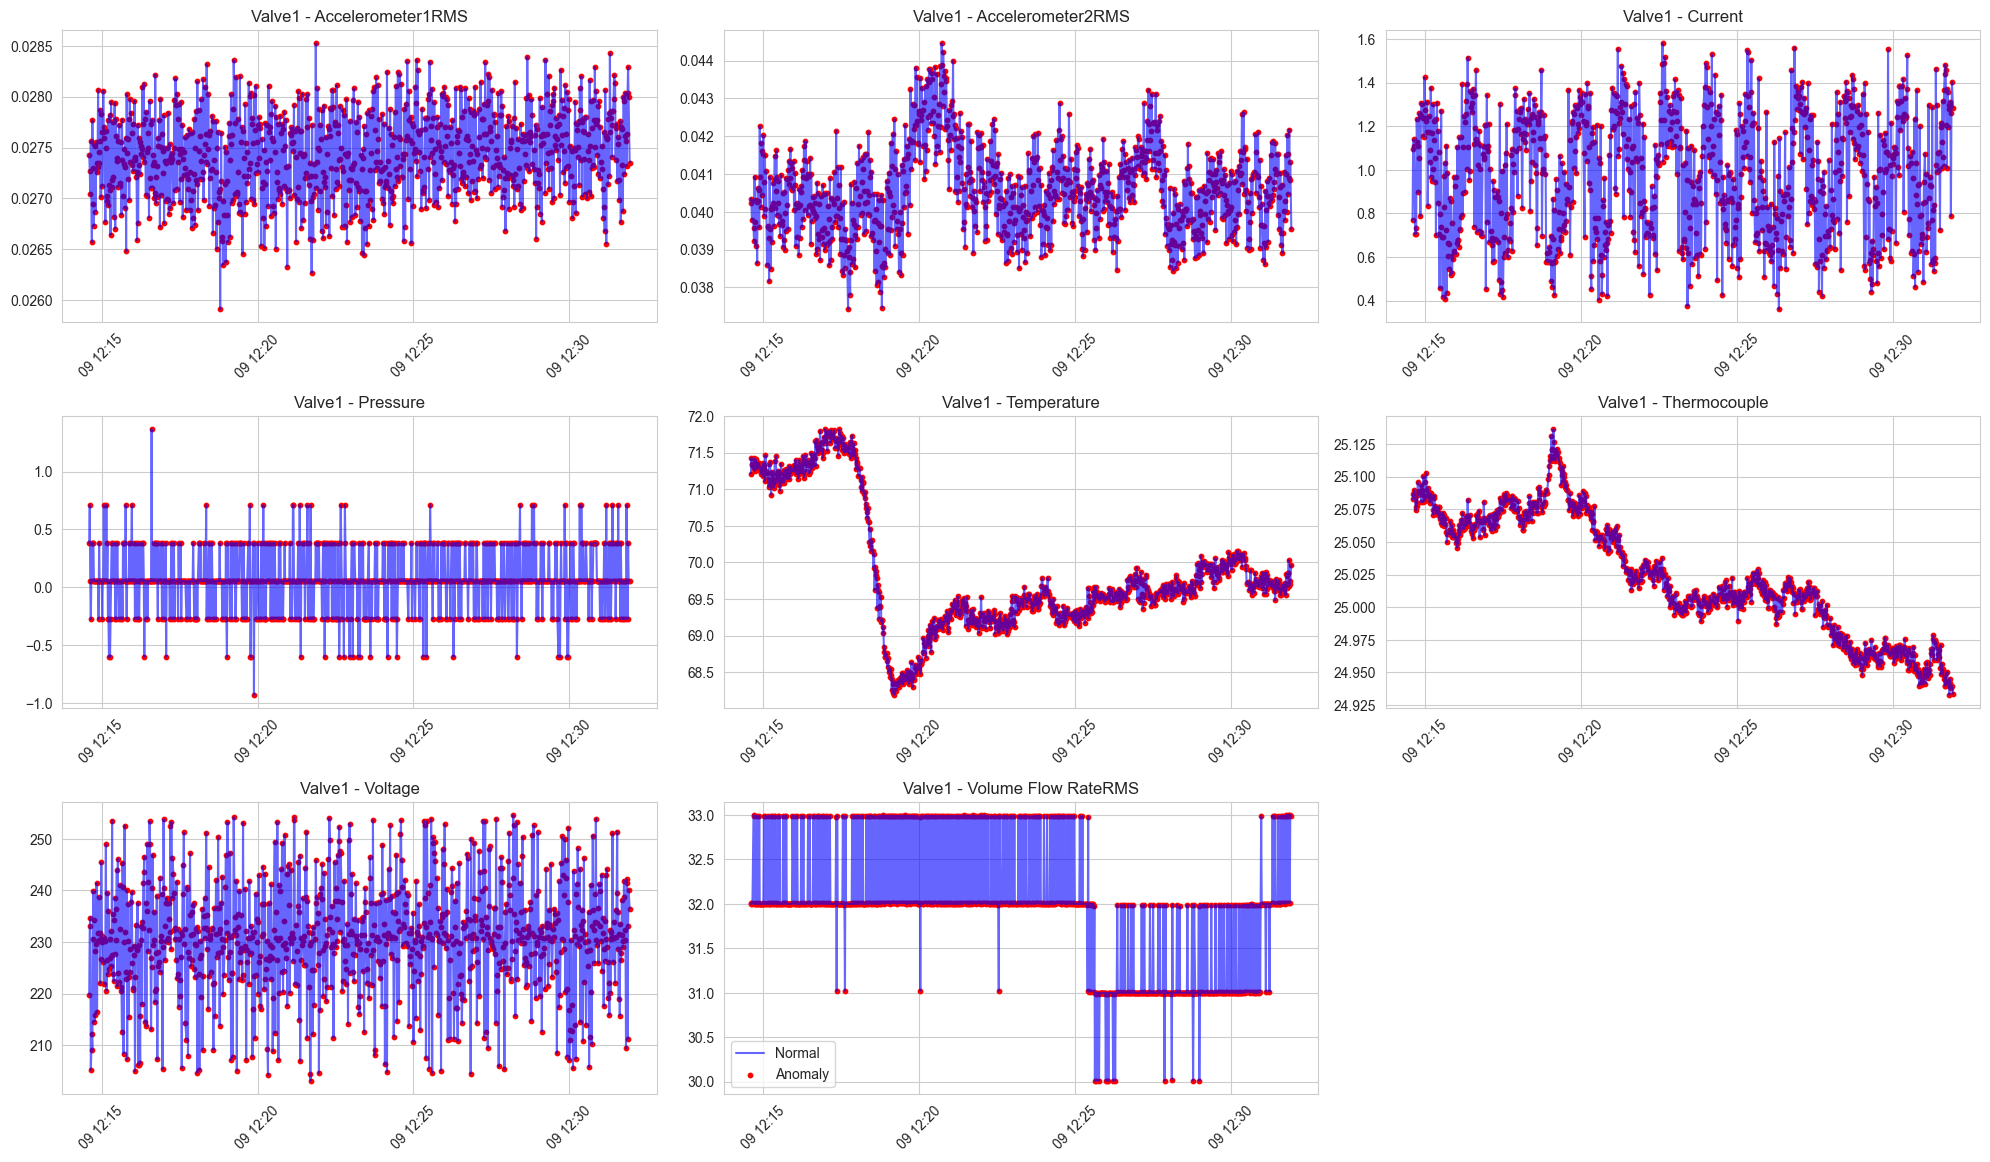

Visualizing Valve2 with Anomalies:


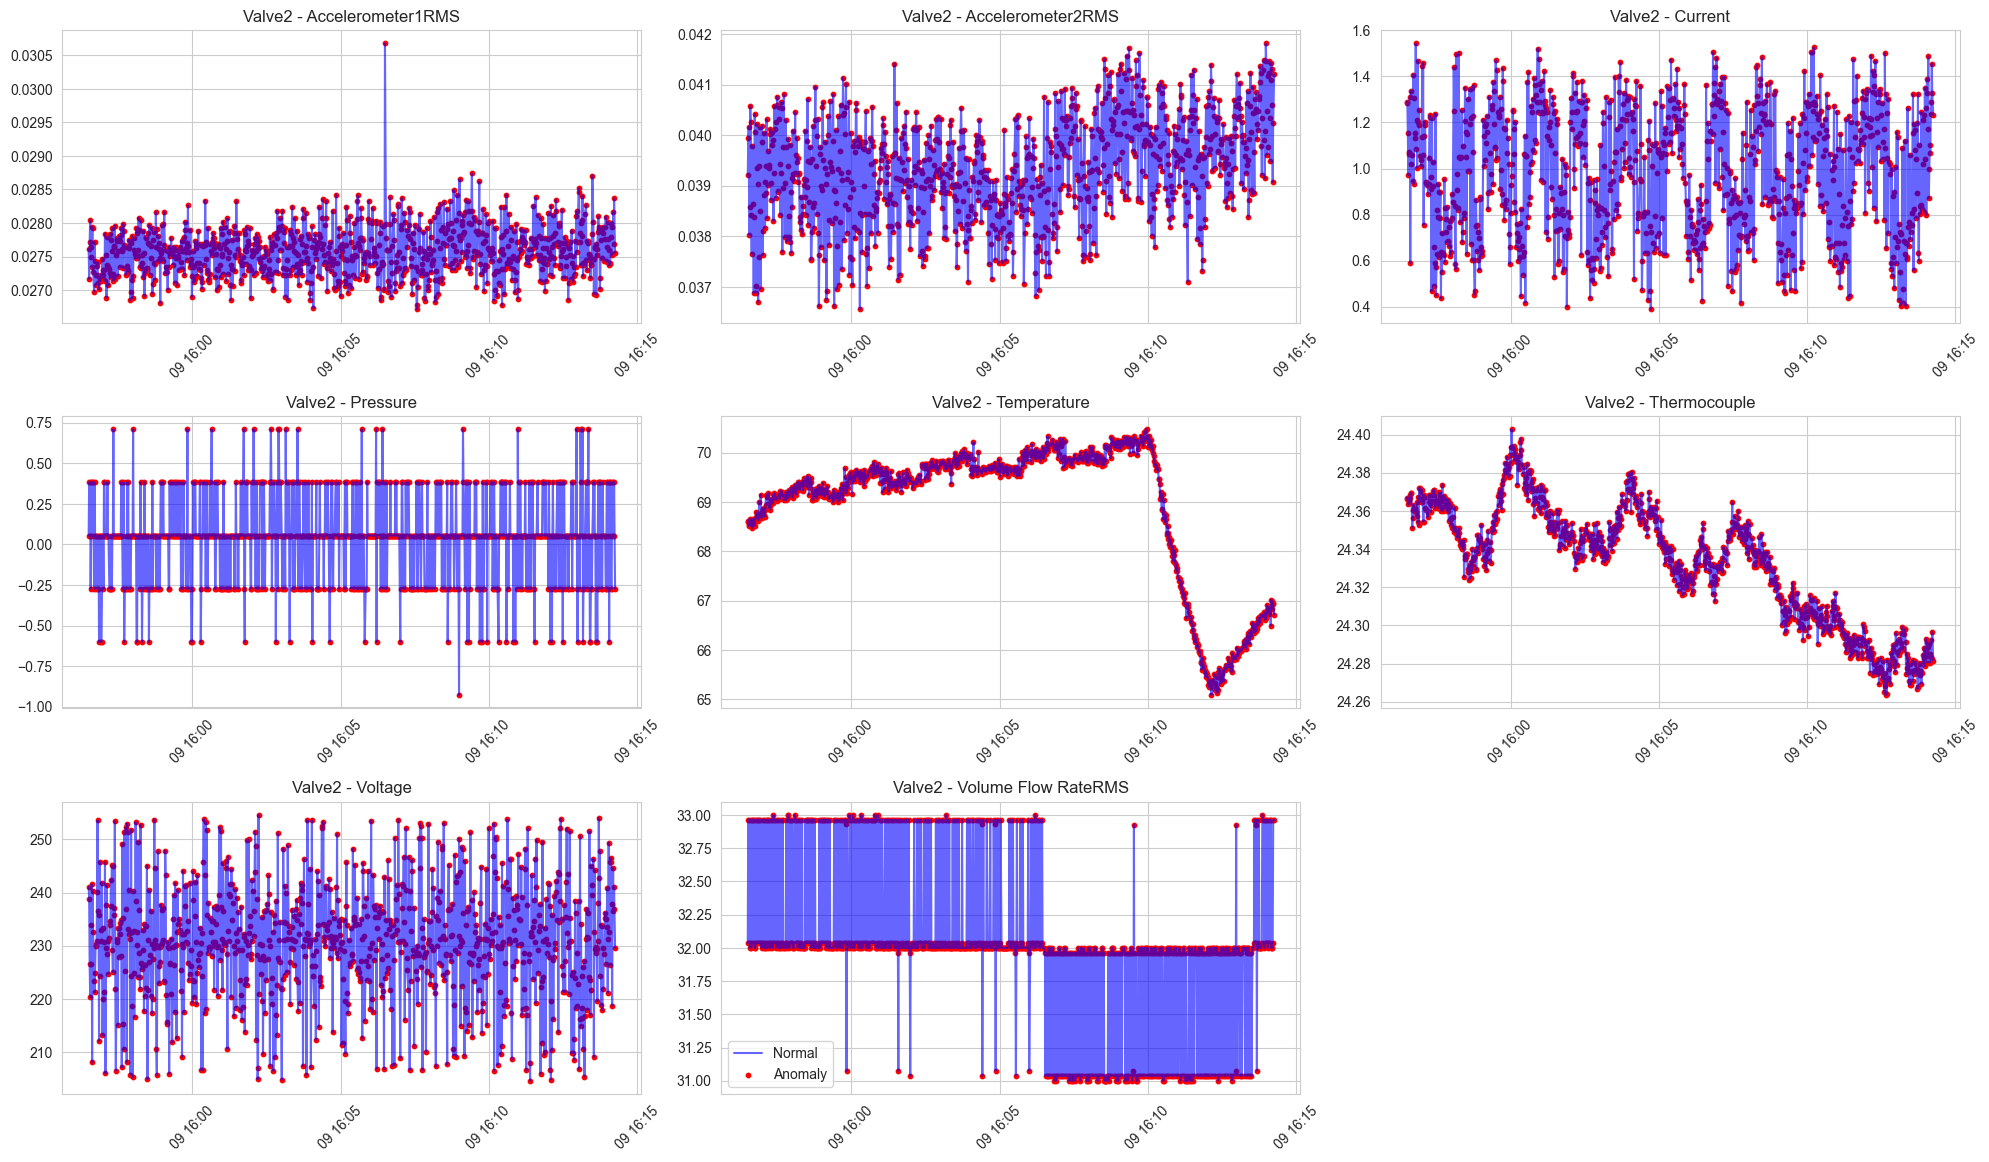

In [10]:
import matplotlib.pyplot as plt

# Function to visualize time series with anomaly markings
def plot_time_series_with_anomalies(df, scaled_data, predictions, dataset_name, max_points=1000):
    # Select numeric features
    numeric_columns = [
        "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
        "Temperature", "Thermocouple", "Voltage", "Volume Flow RateRMS"
    ]
    # Sample data for visualization
    df_sample = df.iloc[:max_points]
    scaled_sample = scaled_data[:max_points]
    preds_sample = predictions[:max_points]
    
    # Plot each feature
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        plt.plot(df_sample["datetime"], df_sample[column], label="Normal", color="blue", alpha=0.6)
        # Highlight anomalies
        anomaly_indices = df_sample.index[preds_sample == 1]
        plt.scatter(df_sample["datetime"].iloc[anomaly_indices], 
                    df_sample[column].iloc[anomaly_indices], 
                    color="red", label="Anomaly", s=10)
        plt.title(f"{dataset_name} - {column}")
        plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize Valve1
print("Visualizing Valve1 with Anomalies:")
plot_time_series_with_anomalies(valve1_df, valve1_scaled, valve1_preds, "Valve1")

# Visualize Valve2
print("Visualizing Valve2 with Anomalies:")
plot_time_series_with_anomalies(valve2_df, valve2_scaled, valve2_preds, "Valve2")



### One Class SVM

In [17]:
from sklearn.preprocessing import RobustScaler

# Function to prepare data with RobustScaler
def prepare_data_with_robust_scaler(anomaly_free_df, valve1_df, valve2_df):
    combined_df = pd.concat([anomaly_free_df, valve1_df, valve2_df], ignore_index=True)
    numeric_columns = [
        "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
        "Temperature", "Thermocouple", "Voltage", "Volume Flow RateRMS"
    ]
    
    scaler = RobustScaler()
    combined_scaled = scaler.fit_transform(combined_df[numeric_columns])
    
    anomaly_free_scaled = combined_scaled[:len(anomaly_free_df)]
    valve1_scaled = combined_scaled[len(anomaly_free_df):len(anomaly_free_df) + len(valve1_df)]
    valve2_scaled = combined_scaled[len(anomaly_free_df) + len(valve1_df):]
    
    return anomaly_free_scaled, valve1_scaled, valve2_scaled, scaler

# Re-prepare scaled data using RobustScaler
anomaly_free_scaled, valve1_scaled, valve2_scaled, robust_scaler = prepare_data_with_robust_scaler(
    anomaly_free_df, valve1_df, valve2_df
)

# Retrain One-Class SVM with updated parameters and normalized data
def retrain_svm_with_robust_scaler(anomaly_free_scaled, valve1_scaled, valve2_scaled):
    svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
    svm.fit(anomaly_free_scaled)

    # Predict on valve1 and valve2
    valve1_preds_raw = svm.predict(valve1_scaled)
    valve2_preds_raw = svm.predict(valve2_scaled)

    # Convert predictions to binary
    valve1_preds_binary = (valve1_preds_raw == -1).astype(int)
    valve2_preds_binary = (valve2_preds_raw == -1).astype(int)

    # Check raw prediction counts
    unique_valve1_preds = pd.Series(valve1_preds_raw).value_counts()
    unique_valve2_preds = pd.Series(valve2_preds_raw).value_counts()
    print("\nRaw prediction counts for Valve1:", unique_valve1_preds.to_dict())
    print("Raw prediction counts for Valve2:", unique_valve2_preds.to_dict())

    # Check anomaly percentage
    check_anomaly_percentage(valve1_preds_binary, "Valve1 (RobustScaler)")
    check_anomaly_percentage(valve2_preds_binary, "Valve2 (RobustScaler)")

    # Calculate metrics
    valve1_true = valve1_df["anomaly"].values.astype(int)
    valve2_true = valve2_df["anomaly"].values.astype(int)

    f1_valve1 = f1_score(valve1_true, valve1_preds_binary)
    precision_valve1 = precision_score(valve1_true, valve1_preds_binary)
    recall_valve1 = recall_score(valve1_true, valve1_preds_binary)

    f1_valve2 = f1_score(valve2_true, valve2_preds_binary)
    precision_valve2 = precision_score(valve2_true, valve2_preds_binary)
    recall_valve2 = recall_score(valve2_true, valve2_preds_binary)

    print("\nValve1 Results (RobustScaler):")
    print(f"F1 Score: {f1_valve1:.2f}, Precision: {precision_valve1:.2f}, Recall: {recall_valve1:.2f}")
    print("\nValve2 Results (RobustScaler):")
    print(f"F1 Score: {f1_valve2:.2f}, Precision: {precision_valve2:.2f}, Recall: {recall_valve2:.2f}")

    return svm, valve1_preds_binary, valve2_preds_binary

# Retrain and evaluate One-Class SVM with RobustScaler
svm_robust_model, valve1_robust_preds, valve2_robust_preds = retrain_svm_with_robust_scaler(
    anomaly_free_scaled, valve1_scaled, valve2_scaled
)




Raw prediction counts for Valve1: {-1: 18156, 1: 4}
Raw prediction counts for Valve2: {-1: 4312}
Valve1 (RobustScaler):
Total Points: 18160, Anomalies: 18156 (99.98%), Normal: 4 (0.02%)
Valve2 (RobustScaler):
Total Points: 4312, Anomalies: 4312 (100.00%), Normal: 0 (0.00%)

Valve1 Results (RobustScaler):
F1 Score: 1.00, Precision: 1.00, Recall: 1.00

Valve2 Results (RobustScaler):
F1 Score: 1.00, Precision: 1.00, Recall: 1.00


In [22]:
# Retrain One-Class SVM with even lower nu and gamma
def retrain_svm_with_better_params(anomaly_free_scaled, valve1_scaled, valve2_scaled):
    svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)  # Further adjustment of gamma and nu
    svm.fit(anomaly_free_scaled)

    # Predict on valve1 and valve2
    valve1_preds_raw = svm.predict(valve1_scaled)
    valve2_preds_raw = svm.predict(valve2_scaled)

    # Convert predictions to binary
    valve1_preds_binary = (valve1_preds_raw == -1).astype(int)
    valve2_preds_binary = (valve2_preds_raw == -1).astype(int)

    # Check raw prediction counts
    unique_valve1_preds = pd.Series(valve1_preds_raw).value_counts()
    unique_valve2_preds = pd.Series(valve2_preds_raw).value_counts()
    print("\nRaw prediction counts for Valve1 (Optimized):", unique_valve1_preds.to_dict())
    print("Raw prediction counts for Valve2 (Optimized):", unique_valve2_preds.to_dict())

    # Check anomaly percentage
    check_anomaly_percentage(valve1_preds_binary, "Valve1 (Optimized)")
    check_anomaly_percentage(valve2_preds_binary, "Valve2 (Optimized)")

    # Calculate metrics
    valve1_true = valve1_df["anomaly"].values.astype(int)
    valve2_true = valve2_df["anomaly"].values.astype(int)

    f1_valve1 = f1_score(valve1_true, valve1_preds_binary)
    precision_valve1 = precision_score(valve1_true, valve1_preds_binary)
    recall_valve1 = recall_score(valve1_true, valve1_preds_binary)

    f1_valve2 = f1_score(valve2_true, valve2_preds_binary)
    precision_valve2 = precision_score(valve2_true, valve2_preds_binary)
    recall_valve2 = recall_score(valve2_true, valve2_preds_binary)

    print("\nValve1 Results (Optimized):")
    print(f"F1 Score: {f1_valve1:.2f}, Precision: {precision_valve1:.2f}, Recall: {recall_valve1:.2f}")
    print("\nValve2 Results (Optimized):")
    print(f"F1 Score: {f1_valve2:.2f}, Precision: {precision_valve2:.2f}, Recall: {recall_valve2:.2f}")

    return svm, valve1_preds_binary, valve2_preds_binary

# Retrain and evaluate One-Class SVM with optimized parameters
svm_optimized_model, valve1_optimized_preds, valve2_optimized_preds = retrain_svm_with_better_params(
    anomaly_free_scaled, valve1_scaled, valve2_scaled
)



Raw prediction counts for Valve1 (Optimized): {-1: 18160}
Raw prediction counts for Valve2 (Optimized): {-1: 4312}
Valve1 (Optimized):
Total Points: 18160, Anomalies: 18160 (100.00%), Normal: 0 (0.00%)
Valve2 (Optimized):
Total Points: 4312, Anomalies: 4312 (100.00%), Normal: 0 (0.00%)

Valve1 Results (Optimized):
F1 Score: 1.00, Precision: 1.00, Recall: 1.00

Valve2 Results (Optimized):
F1 Score: 1.00, Precision: 1.00, Recall: 1.00


Visualizing Valve1 with One-Class SVM Anomalies:


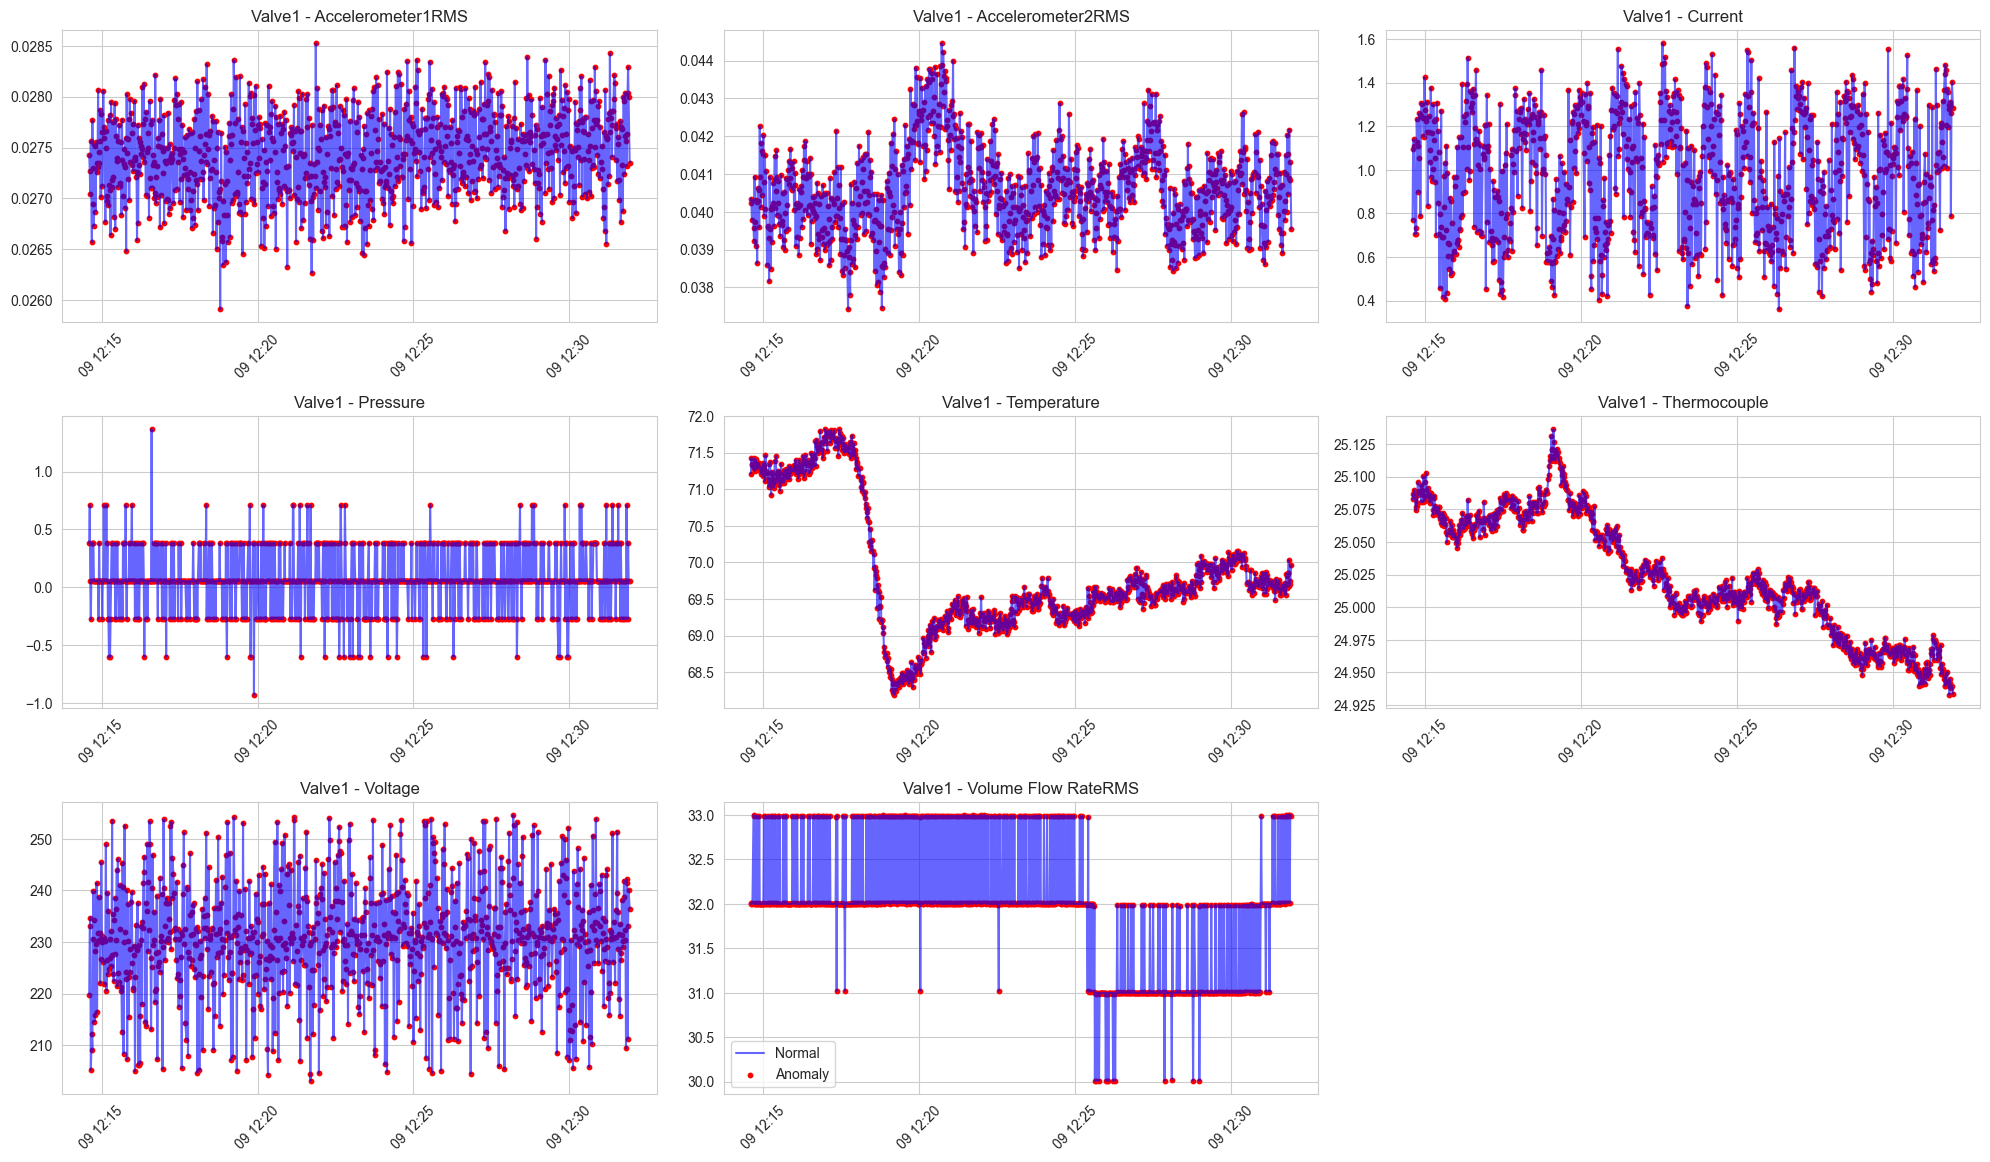

Visualizing Valve2 with One


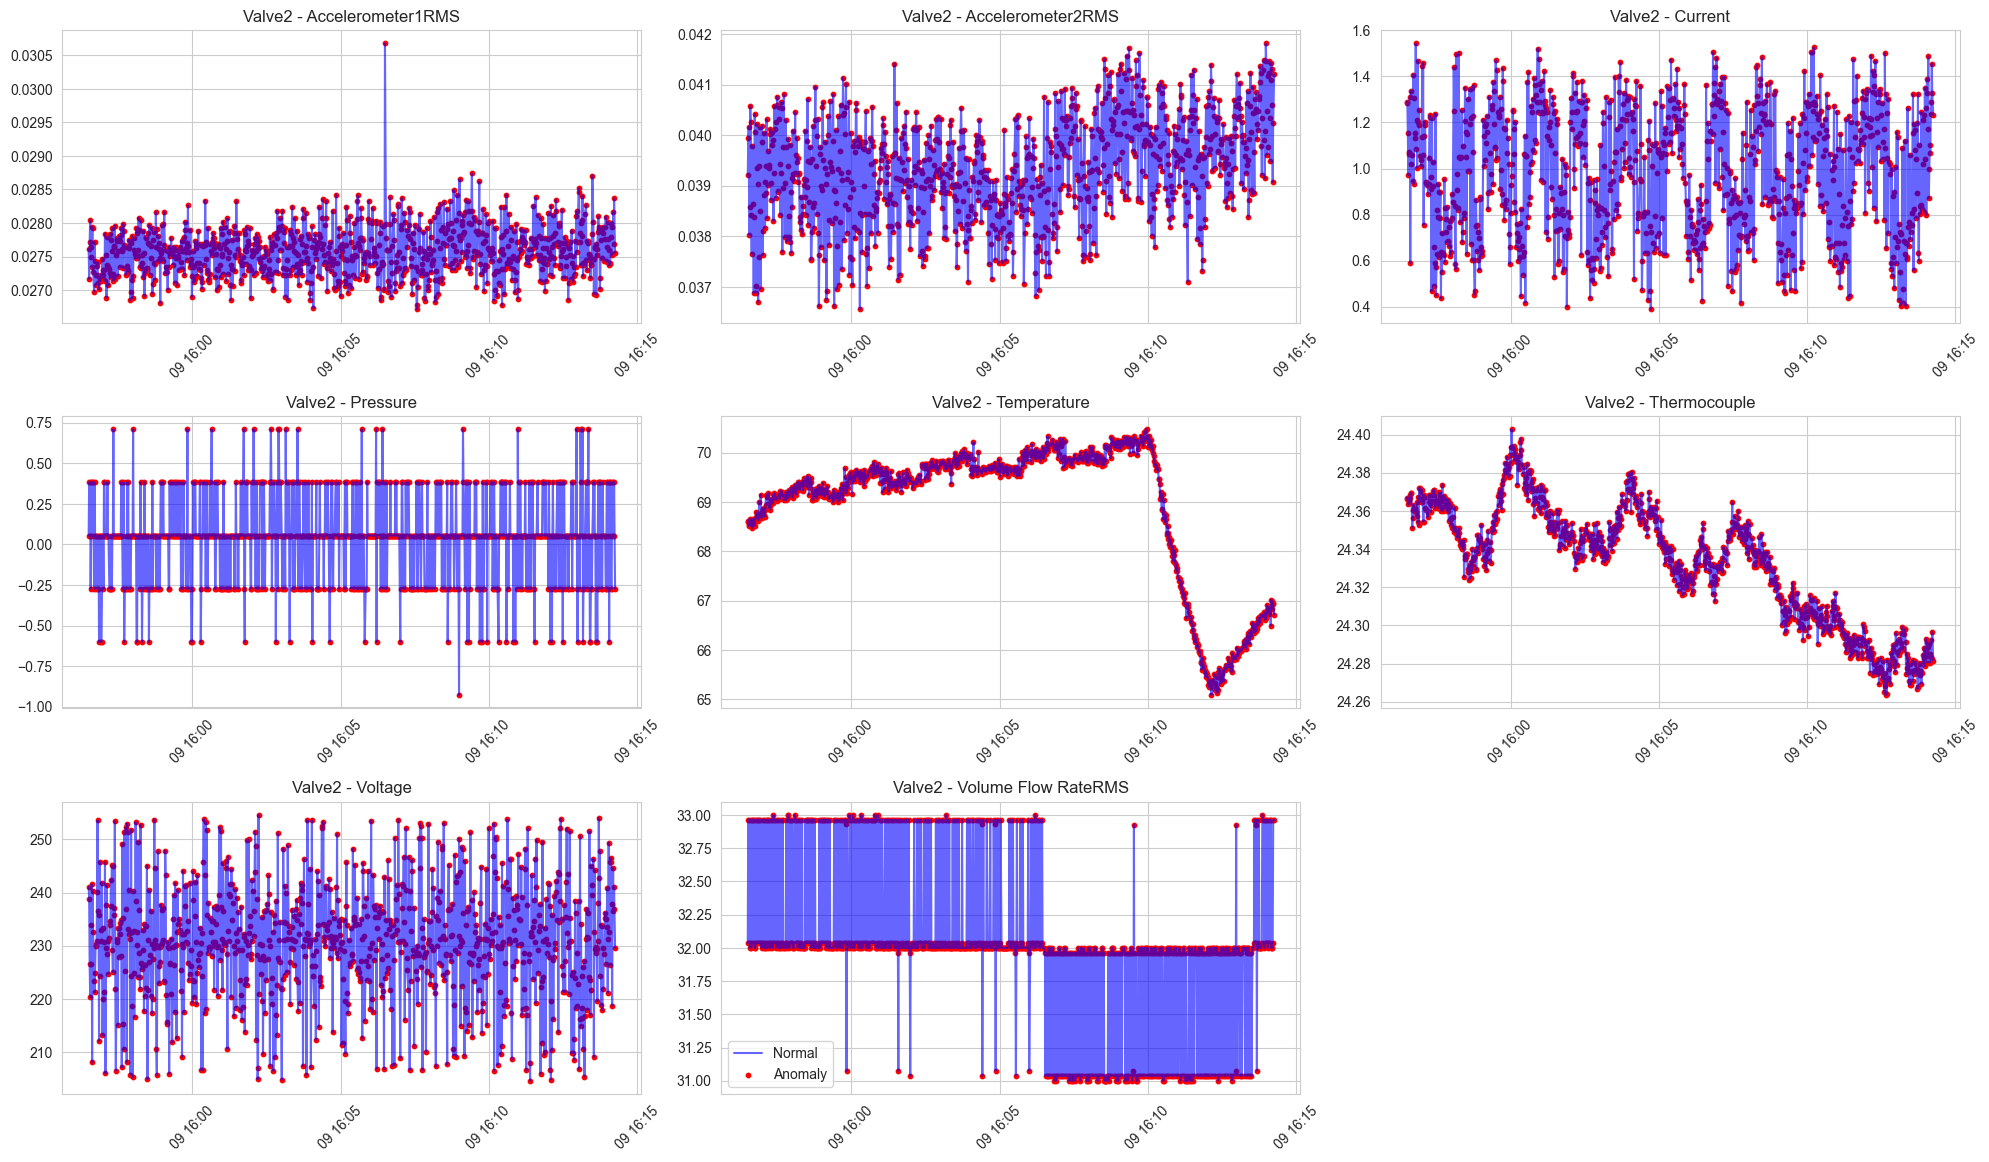

In [14]:
# Function to visualize time series with anomaly markings for One-Class SVM
def plot_svm_time_series_with_anomalies(df, scaled_data, predictions, dataset_name, max_points=1000):
    # Select numeric features
    numeric_columns = [
        "Accelerometer1RMS", "Accelerometer2RMS", "Current", "Pressure",
        "Temperature", "Thermocouple", "Voltage", "Volume Flow RateRMS"
    ]
    # Sample data for visualization
    df_sample = df.iloc[:max_points]
    scaled_sample = scaled_data[:max_points]
    preds_sample = predictions[:max_points]
    
    # Plot each feature
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        plt.plot(df_sample["datetime"], df_sample[column], label="Normal", color="blue", alpha=0.6)
        # Highlight anomalies
        anomaly_indices = df_sample.index[preds_sample == 1]
        plt.scatter(df_sample["datetime"].iloc[anomaly_indices], 
                    df_sample[column].iloc[anomaly_indices], 
                    color="red", label="Anomaly", s=10)
        plt.title(f"{dataset_name} - {column}")
        plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize Valve1 with SVM anomalies
print("Visualizing Valve1 with One-Class SVM Anomalies:")
plot_svm_time_series_with_anomalies(valve1_df, valve1_scaled, valve1_svm_preds, "Valve1")

# Visualize Valve2 with SVM anomalies
print("Visualizing Valve2 with One")
plot_svm_time_series_with_anomalies(valve2_df, valve2_scaled, valve2_svm_preds, "Valve2")



In [15]:
# Check the percentage of anomalies predicted
def check_anomaly_percentage(predictions, dataset_name):
    total_points = len(predictions)
    anomalies = (predictions == 1).sum()
    normal_points = total_points - anomalies
    print(f"{dataset_name}:")
    print(f"Total Points: {total_points}, Anomalies: {anomalies} ({anomalies/total_points:.2%}), Normal: {normal_points} ({normal_points/total_points:.2%})")

# Check anomaly percentage for Valve1 and Valve2
check_anomaly_percentage(valve1_svm_preds, "Valve1")
check_anomaly_percentage(valve2_svm_preds, "Valve2")

Valve1:
Total Points: 18160, Anomalies: 18160 (100.00%), Normal: 0 (0.00%)
Valve2:
Total Points: 4312, Anomalies: 4312 (100.00%), Normal: 0 (0.00%)



Count of anomalies in Valve1 and Valve2:

Valve1 anomaly counts:
anomaly
1    18160
Name: count, dtype: int64

Valve2 anomaly counts:
anomaly
1    4312
Name: count, dtype: int64


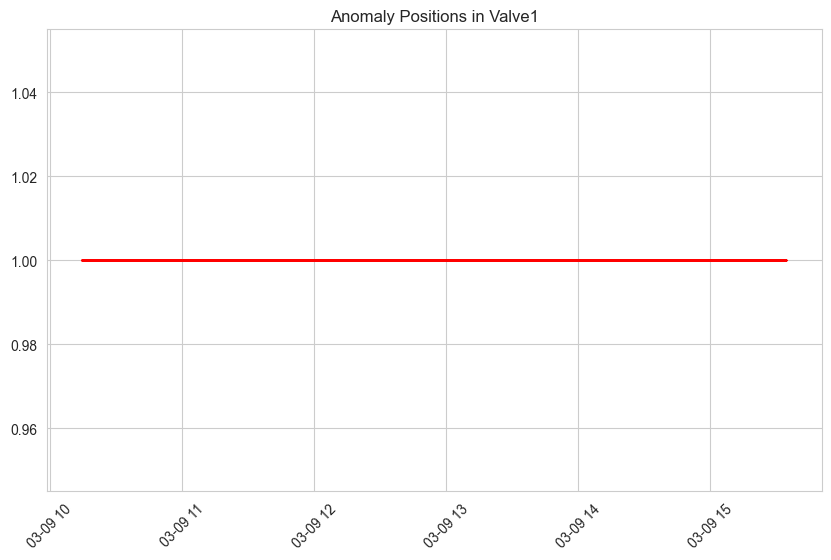

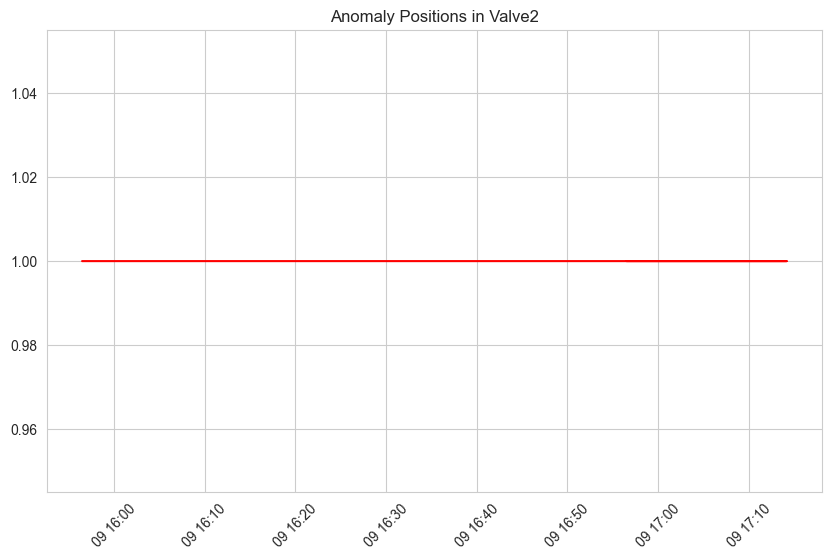

In [23]:
# Check how many anomalies are actually in the dataset
print("\nCount of anomalies in Valve1 and Valve2:")
valve1_anomaly_counts = valve1_df["anomaly"].value_counts()
valve2_anomaly_counts = valve2_df["anomaly"].value_counts()

print(f"\nValve1 anomaly counts:\n{valve1_anomaly_counts}")
print(f"\nValve2 anomaly counts:\n{valve2_anomaly_counts}")

# Visualize where anomalies are located in Valve1
plt.figure(figsize=(10, 6))
plt.plot(valve1_df["datetime"], valve1_df["anomaly"], label="Anomaly", color="red")
plt.title("Anomaly Positions in Valve1")
plt.xticks(rotation=45)
plt.show()

# Visualize where anomalies are located in Valve2
plt.figure(figsize=(10, 6))
plt.plot(valve2_df["datetime"], valve2_df["anomaly"], label="Anomaly", color="red")
plt.title("Anomaly Positions in Valve2")
plt.xticks(rotation=45)
plt.show()


In [25]:
# Check where the model and ground truth agree on anomalies
def compare_anomalies(true_anomalies, predicted_anomalies, dataset_name):
    indices_true = set(true_anomalies[true_anomalies == 1].index)
    indices_pred = set(predicted_anomalies[predicted_anomalies == 1].index)
    common_indices = indices_true & indices_pred
    only_in_true = indices_true - indices_pred
    only_in_pred = indices_pred - indices_true
    print(f"\n{dataset_name} - Anomaly Comparison")
    print(f"Common anomalies (model & ground truth): {len(common_indices)}")
    print(f"Anomalies in ground truth but not in model: {len(only_in_true)}")
    print(f"Anomalies in model but not in ground truth: {len(only_in_pred)}")
    return common_indices, only_in_true, only_in_pred

# Compare anomalies for Valve1 and Valve2
valve1_common, valve1_only_true, valve1_only_pred = compare_anomalies(
    valve1_df["anomaly"], valve1_optimized_preds, "Valve1"
)

valve2_common, valve2_only_true, valve2_only_pred = compare_anomalies(
    valve2_df["anomaly"], valve2_optimized_preds, "Valve2"
)


AttributeError: 'numpy.ndarray' object has no attribute 'index'